# Example pipeline for easier usage


### SETUP

In [ ]:
# Clone my github repositories for the necessary modules
!git clone https://github.com/Najlaron/PySPRESSO
!git clone https://github.com/Najlaron/pdf_reporter

# Install other necessary modules
%pip install reportlab
%pip install PyPDF2

In [ ]:
import PySPRESSO.pmf_01 as pmf
import pdf_reporter.pdf_reporter as pdf_rptr

wf = pmf.Workflow()

### Upload your files into Files (on the left)

## Change things in the following cell according to your data and settings

In [2]:
# You can change the names and paths to the files here, but there are also demo_data

demo_data = 'https://raw.githubusercontent.com/Najlaron/PySPRESSO/main/demo_data.csv'
demo_batch_info = 'https://raw.githubusercontent.com/Najlaron/PySPRESSO/main/demo_data_batch_info.csv'


# Names
name = "Demo_data-POS" # Name of the workflow
main_folder = "Demo_data-POS_analysis" # Name of the main folder
report_file_name = "Demo_data-POS-report" # Name of the report file
output_file_prefix = "Demo_data-POS" # Prefix for the output files
# Choose if you want the report to be for proccessing or statistics (for both use either one - just a visual difference)
report_type = "processing" # or "statistics"


# Paths to the data files UPLOAD YOUR FILES INTO COLAB (ON THE LEFT) OR TRY DEMO ON OUR FILES
data_input_file_name = demo_data # Path to the data file
batch_info_input_file_name = demo_batch_info # Path to the batch info file


# Incorporating the changes
wf.set_name(name)
wf.set_main_folder(main_folder)
wf.set_report_file_name(report_file_name)
wf.initializer_report(report_type = report_type)
wf.initializer_folders()
wf.set_output_file_prefix(output_file_prefix)


Workflow name set to: Coffee_data-POS
Main folder set.
Report file name set.
Report initialized.
Folders initialized.
Output file prefix set.


## Loading the data

#### Change the parameters if error occurs or you want different settings

In [3]:
# Load data
wf.loader_data(data_input_file_name, separator = ';', encoding = 'utf-8')

# Add cpdID
wf.add_cpdID(mz_col = 'm/z', rt_col = 'RT [min]')

# Extract variable metadata from the data by choosing specific columns
wf.extracter_variable_metadata(column_index_ranges = [(10, 15), (18, 23)])

# Extract numerical data from the data by choosing columns starting with prefix
wf.extracter_data(prefix = 'Area:')

# Load batch info
wf.loader_batch_info(batch_info_input_file_name)

# Reorder data based on the creation date in the batch info file;
# distinguisher is something in the name of the file after which a name or number of the batch follows
wf.batch_by_name_reorder(distinguisher = None, format='%d.%m.%Y %H:%M')

# Extract metadata from batch info by choosing specific columns
group_columns_to_keep = ['Type', 'Type 2']
# columns such Study File ID, File Name, Creation Date, Sample Type, ... are always kept
wf.extracter_metadata(group_columns_to_keep, prefix = 'Area:')

print()

Data loaded.
Compound ID was added to the data
Variable metadata was extracted from the data.
Important columns were kept in the data and rest filtered out.
Batch info loaded.
Data reordered based on the creation date from batch info.
Not found: 5 ;being: [['F92', 'Identification Only'], ['F93', 'Identification Only'], ['F94', 'Identification Only'], ['F95', 'Identification Only'], ['F96', 'Identification Only']]
Names not identified: 0 ;being: []



## Showing all the data matrices

In [4]:
wf.data

,cpdID,Area: BLANK01_POS.raw (F7),Area: dQC625_01_POS.raw (F28),Area: dQC125_01_POS.raw (F26),Area: dQC25_01_POS.raw (F20),Area: dQC50_01_POS.raw (F22),Area: dQC100_01_POS.raw (F24),Area: QC11_POS.raw (F97),Area: QC12_POS.raw (F98),Area: EY_Ol_02_R_POS.raw (F48),...,Area: dQC125_02_POS.raw (F27),Area: dQC25_02_POS.raw (F21),Area: dQC50_02_POS.raw (F23),Area: dQC100_02_POS.raw (F25),Area: dIS625_POS.raw (F19),Area: dIS125_POS.raw (F18),Area: dIS25_POS.raw (F15),Area: dIS50_POS.raw (F16),Area: dIS100_POS.raw (F17),Area: BLANK02_POS.raw (F8)
0,M138T350,1.441664e+07,8.541340e+08,1.172623e+09,1.378106e+09,1.643918e+09,1.887580e+09,2.023172e+09,1.990985e+09,1.943874e+09,...,1.222383e+09,1.450101e+09,1.721176e+09,1.945950e+09,7.972386e+06,1.301456e+07,1.344040e+07,2.384493e+06,2.182257e+06,2.250933e+06
1,M195T46,2.554504e+06,1.572669e+08,2.147106e+08,2.862703e+08,4.174757e+08,5.688577e+08,6.364744e+08,6.266685e+08,5.796860e+08,...,2.058392e+08,3.020778e+08,4.287956e+08,6.303846e+08,1.091908e+06,6.464775e+05,4.853303e+05,4.206629e+05,3.312217e+05,4.652319e+05
2,M195T46_1,2.554504e+06,1.572669e+08,2.147106e+08,2.862703e+08,4.174757e+08,5.688577e+08,6.364744e+08,6.266685e+08,5.796860e+08,...,2.058392e+08,3.020778e+08,4.287956e+08,6.303846e+08,1.322549e+06,7.896353e+05,5.935679e+05,5.087824e+05,4.104123e+05,4.652319e+05
3,M195T45,2.554504e+06,1.572669e+08,2.147106e+08,2.862703e+08,4.174757e+08,5.688577e+08,6.364744e+08,6.266685e+08,5.796860e+08,...,2.058392e+08,3.020778e+08,4.287956e+08,6.303846e+08,9.882808e+05,5.902034e+05,4.346673e+05,3.845191e+05,2.964283e+05,4.652319e+05
4,M94T225,3.206810e+06,1.188683e+08,3.514359e+08,4.512481e+08,4.248412e+08,7.745688e+08,8.116503e+08,7.594620e+08,6.506121e+08,...,1.052682e+08,4.312063e+08,5.526199e+08,7.331560e+08,3.190665e+06,2.626148e+06,2.251301e+06,2.224399e+06,2.252262e+06,4.143978e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6126,M304T313,2.945506e+03,3.311215e+03,3.523570e+03,4.206812e+03,5.202586e+03,8.172513e+03,7.993850e+03,6.668858e+03,8.467832e+03,...,3.408765e+03,3.889014e+03,4.903009e+03,6.415516e+03,2.477190e+03,2.347047e+03,2.483778e+03,2.364782e+03,2.543627e+03,2.346567e+03
6127,M338T311,2.324363e+03,2.733887e+03,3.127484e+03,3.737849e+03,4.963644e+03,2.052299e+04,9.155555e+03,1.124865e+04,6.730911e+03,...,2.719320e+03,3.429963e+03,4.285851e+03,7.552684e+03,2.011062e+03,1.852106e+03,1.985197e+03,1.887962e+03,1.784903e+03,1.920055e+03
6128,M617T38,7.158947e+03,1.811264e+03,4.107768e+03,6.512607e+03,7.551987e+03,5.788647e+03,6.936201e+03,7.138958e+03,7.936204e+03,...,3.860655e+03,5.128355e+03,5.901907e+03,7.853761e+03,1.654156e+03,1.503940e+03,1.586309e+03,1.431866e+03,1.519433e+03,1.176314e+04
6129,M615T38,6.590478e+03,1.667437e+03,2.552867e+03,4.332106e+03,5.862785e+03,5.328989e+03,5.843568e+03,6.572076e+03,7.306015e+03,...,3.415915e+03,3.884826e+03,5.433255e+03,7.230119e+03,1.522805e+03,1.384517e+03,1.460346e+03,1.318166e+03,1.398779e+03,1.082906e+04


In [5]:
wf.metadata

,Study File ID,File Name,Creation Date,Sample Type,Polarity,Batch,Coffee Brand,Coffee Type,Sample File
0,F7,D:\Projects_Orbitrap_Elite\Richard\20220324_Co...,2022-03-24 16:46:00,Blank,POS,all_one_batch,Blank,Blank,Area: BLANK01_POS.raw (F7)
1,F28,D:\Projects_Orbitrap_Elite\Richard\20220324_Co...,2022-03-24 17:02:00,Standard,POS,all_one_batch,QC,QC-IS,Area: dQC625_01_POS.raw (F28)
2,F26,D:\Projects_Orbitrap_Elite\Richard\20220324_Co...,2022-03-24 17:17:00,Standard,POS,all_one_batch,QC,QC-IS,Area: dQC125_01_POS.raw (F26)
3,F20,D:\Projects_Orbitrap_Elite\Richard\20220324_Co...,2022-03-24 17:33:00,Standard,POS,all_one_batch,QC,QC-IS,Area: dQC25_01_POS.raw (F20)
4,F22,D:\Projects_Orbitrap_Elite\Richard\20220324_Co...,2022-03-24 17:48:00,Standard,POS,all_one_batch,QC,QC-IS,Area: dQC50_01_POS.raw (F22)
...,...,...,...,...,...,...,...,...,...
96,F18,D:\Projects_Orbitrap_Elite\Richard\20220324_Co...,2022-03-25 18:52:00,Standard,POS,all_one_batch,QC,QC-IS,Area: dIS125_POS.raw (F18)
97,F15,D:\Projects_Orbitrap_Elite\Richard\20220324_Co...,2022-03-25 19:08:00,Standard,POS,all_one_batch,QC,QC-IS,Area: dIS25_POS.raw (F15)
98,F16,D:\Projects_Orbitrap_Elite\Richard\20220324_Co...,2022-03-25 19:23:00,Standard,POS,all_one_batch,QC,QC-IS,Area: dIS50_POS.raw (F16)
99,F17,D:\Projects_Orbitrap_Elite\Richard\20220324_Co...,2022-03-25 19:39:00,Standard,POS,all_one_batch,QC,QC-IS,Area: dIS100_POS.raw (F17)


In [6]:
wf.variable_metadata

,cpdID,Name,Formula,Annot. DeltaMass [ppm],Annotation MW,Calc. MW,m/z,RT [min],# mzVault Results,CSID,SMILES,InChI Key,mzCloud Best Match
0,M138T350,2-Hydroxybenzamide,C7 H7 N O2,-1.68,137.04768,137.04745,138.05472,5.829,0,4963.0,c1ccc(c(c1)C(=O)N)O,SKZKKFZAGNVIMN-UHFFFAOYSA-N,NaN
1,M195T46,Cafeine,C8 H10 N4 O2,-1.68,194.08038,194.08005,195.08733,0.759,0,NaN,NaN,NaN,NaN
2,M195T46_1,(Hexanoylamino)acetate,C8 H14 N O3,4.04,172.09737,172.09806,195.08728,0.765,0,1271264.0,CCCCCC(=O)NCC(=O)[O-],UPCKIPHSXMXJOX-UHFFFAOYSA-M,NaN
3,M195T45,NaN,NaN,NaN,NaN,156.12419,195.08735,0.756,0,NaN,NaN,NaN,NaN
4,M94T225,Aniline,C6 H7 N,-1.38,93.05785,93.05772,94.06500,3.744,0,5889.0,c1ccc(cc1)N,PAYRUJLWNCNPSJ-UHFFFAOYSA-N,96.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6126,M304T313,Delphinidin,C15 H11 O7,-1.35,303.05048,303.05007,304.05735,5.213,0,114185.0,c1c(cc(c(c1O)O)O)c2c(cc3c(cc(cc3[o+]2)O)O)O,JKHRCGUTYDNCLE-UHFFFAOYSA-O,NaN
6127,M338T311,"N-(3,5-Dimethoxyphenyl)-3-[4-(2-hydroxyethyl)-...",C17 H27 N3 O4,-1.82,337.20016,337.19954,338.20679,5.189,0,628050.0,COc1cc(cc(c1)OC)NC(=O)CCN2CCN(CC2)CCO,WJXXLQYTSJZGOL-UHFFFAOYSA-N,NaN
6128,M617T38,"PA(12:0/18:2(9Z,12Z))",C33 H61 O8 P,-0.65,616.41041,616.41001,617.41728,0.628,0,NaN,NaN,NaN,NaN
6129,M615T38,"PA(12:0/18:3(6Z,9Z,12Z))",C33 H59 O8 P,-1.80,614.39476,614.39365,615.40092,0.627,0,NaN,NaN,NaN,NaN


In [7]:
wf.batch_info

,Study File ID,File Name,Creation Date,RT Range [min],Instrument Name,Software Revision,Ref. File ID,Alignment Score,Sample Type,Polarity,Replicates,Coffee Type,Coffee Brand,Max. Mass [Da],Batch
0,F7,D:\Projects_Orbitrap_Elite\Richard\20220324_Co...,2022-03-24 16:46:00,0.00 - 14.00,Orbitrap Elite,2.7.0 SP2,F104,0.637,Blank,POS,Support Samples,Blank,Blank,1050,all_one_batch
1,F28,D:\Projects_Orbitrap_Elite\Richard\20220324_Co...,2022-03-24 17:02:00,0.00 - 14.00,Orbitrap Elite,2.7.0 SP2,F104,0.796,Standard,POS,Support Samples,QC-IS,QC,1050,all_one_batch
2,F26,D:\Projects_Orbitrap_Elite\Richard\20220324_Co...,2022-03-24 17:17:00,0.00 - 14.00,Orbitrap Elite,2.7.0 SP2,F104,0.863,Standard,POS,Support Samples,QC-IS,QC,1050,all_one_batch
3,F20,D:\Projects_Orbitrap_Elite\Richard\20220324_Co...,2022-03-24 17:33:00,0.00 - 14.00,Orbitrap Elite,2.7.0 SP2,F104,0.916,Standard,POS,Support Samples,QC-IS,QC,1050,all_one_batch
4,F22,D:\Projects_Orbitrap_Elite\Richard\20220324_Co...,2022-03-24 17:48:00,0.00 - 14.00,Orbitrap Elite,2.7.0 SP2,F104,0.959,Standard,POS,Support Samples,QC-IS,QC,1050,all_one_batch
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,F18,D:\Projects_Orbitrap_Elite\Richard\20220324_Co...,2022-03-25 18:52:00,0.00 - 14.00,Orbitrap Elite,2.7.0 SP2,F104,0.558,Standard,POS,Support Samples,QC-IS,QC,1050,all_one_batch
97,F15,D:\Projects_Orbitrap_Elite\Richard\20220324_Co...,2022-03-25 19:08:00,0.00 - 14.00,Orbitrap Elite,2.7.0 SP2,F104,0.557,Standard,POS,Support Samples,QC-IS,QC,1050,all_one_batch
98,F16,D:\Projects_Orbitrap_Elite\Richard\20220324_Co...,2022-03-25 19:23:00,0.00 - 14.00,Orbitrap Elite,2.7.0 SP2,F104,0.572,Standard,POS,Support Samples,QC-IS,QC,1050,all_one_batch
99,F17,D:\Projects_Orbitrap_Elite\Richard\20220324_Co...,2022-03-25 19:39:00,0.00 - 14.00,Orbitrap Elite,2.7.0 SP2,F104,0.576,Standard,POS,Support Samples,QC-IS,QC,1050,all_one_batch


## Setup QC samples and blank samples

### Change the distinguisher (label) or the column names, if necessary

In [8]:
# Define how the QC samples are distinguished from the rest of the samples
qc_samples_distinguisher = 'Quality Control'

# Get a list of the QC samples
QC_samples = wf.metadata[wf.metadata['Type'] == qc_samples_distinguisher]['Sample File'].tolist()
# Save the list of QC samples
wf.set_QC_samples(QC_samples)

# ---------------------------------------------
# Repeat for the blank samples
blank_samples_distinguisher = 'Blank'

# Get a list of the blank samples
blank_samples = wf.metadata[wf.metadata['Type'] == blank_samples_distinguisher]['Sample File'].tolist()
# Save the list of blank samples
wf.set_blank_samples(blank_samples)



QC samples set.
Blank samples set.


### Setup Batch labels, if you have more then one batch

In [9]:
# IF YOUR DATA INCLUDES BATCHES, RUN THIS CELL WITH PROPER CHANGES 
# (if you dont have batches, you can skip this cell, or set it to None by running this line of code: wf.set_batch(None))

# Define the batches
column_name_in_batch_info = 'Batch'

# Get a list of the batches and filter out the None values
batch = wf.batch_info[column_name_in_batch_info].tolist()

# Filter out the None values
batch = [value for value in batch if value is not None]

# Add the batch info to the metadata
wf.metadata['Batch'] = batch

# Save the list of batches
wf.set_batch(batch)

Batch set.


# PROCESSING & ANALYSIS STEPS

#### Following cells represent the order of processing and analysis steps, that we use

#### Feel free to adjust the parameters or delete/drag cells to skip/change order of the steps 

## PROCESSING

In [10]:
# Remove features with missing values above a certain threshold
wf.filter_missing_values(qc_threshold = 0.8, sample_threshold = 0.5)
# Show data
wf.data


Number of features removed for QC threshold (0.8%): within QC samples: 0 ;being: []
Number of features removed for sample threshold (0.5%): within all samples: 0 ;being: []


,cpdID,Area: BLANK01_POS.raw (F7),Area: dQC625_01_POS.raw (F28),Area: dQC125_01_POS.raw (F26),Area: dQC25_01_POS.raw (F20),Area: dQC50_01_POS.raw (F22),Area: dQC100_01_POS.raw (F24),Area: QC11_POS.raw (F97),Area: QC12_POS.raw (F98),Area: EY_Ol_02_R_POS.raw (F48),...,Area: dQC125_02_POS.raw (F27),Area: dQC25_02_POS.raw (F21),Area: dQC50_02_POS.raw (F23),Area: dQC100_02_POS.raw (F25),Area: dIS625_POS.raw (F19),Area: dIS125_POS.raw (F18),Area: dIS25_POS.raw (F15),Area: dIS50_POS.raw (F16),Area: dIS100_POS.raw (F17),Area: BLANK02_POS.raw (F8)
0,M138T350,1.441664e+07,8.541340e+08,1.172623e+09,1.378106e+09,1.643918e+09,1.887580e+09,2.023172e+09,1.990985e+09,1.943874e+09,...,1.222383e+09,1.450101e+09,1.721176e+09,1.945950e+09,7.972386e+06,1.301456e+07,1.344040e+07,2.384493e+06,2.182257e+06,2.250933e+06
1,M195T46,2.554504e+06,1.572669e+08,2.147106e+08,2.862703e+08,4.174757e+08,5.688577e+08,6.364744e+08,6.266685e+08,5.796860e+08,...,2.058392e+08,3.020778e+08,4.287956e+08,6.303846e+08,1.091908e+06,6.464775e+05,4.853303e+05,4.206629e+05,3.312217e+05,4.652319e+05
2,M195T46_1,2.554504e+06,1.572669e+08,2.147106e+08,2.862703e+08,4.174757e+08,5.688577e+08,6.364744e+08,6.266685e+08,5.796860e+08,...,2.058392e+08,3.020778e+08,4.287956e+08,6.303846e+08,1.322549e+06,7.896353e+05,5.935679e+05,5.087824e+05,4.104123e+05,4.652319e+05
3,M195T45,2.554504e+06,1.572669e+08,2.147106e+08,2.862703e+08,4.174757e+08,5.688577e+08,6.364744e+08,6.266685e+08,5.796860e+08,...,2.058392e+08,3.020778e+08,4.287956e+08,6.303846e+08,9.882808e+05,5.902034e+05,4.346673e+05,3.845191e+05,2.964283e+05,4.652319e+05
4,M94T225,3.206810e+06,1.188683e+08,3.514359e+08,4.512481e+08,4.248412e+08,7.745688e+08,8.116503e+08,7.594620e+08,6.506121e+08,...,1.052682e+08,4.312063e+08,5.526199e+08,7.331560e+08,3.190665e+06,2.626148e+06,2.251301e+06,2.224399e+06,2.252262e+06,4.143978e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6126,M304T313,2.945506e+03,3.311215e+03,3.523570e+03,4.206812e+03,5.202586e+03,8.172513e+03,7.993850e+03,6.668858e+03,8.467832e+03,...,3.408765e+03,3.889014e+03,4.903009e+03,6.415516e+03,2.477190e+03,2.347047e+03,2.483778e+03,2.364782e+03,2.543627e+03,2.346567e+03
6127,M338T311,2.324363e+03,2.733887e+03,3.127484e+03,3.737849e+03,4.963644e+03,2.052299e+04,9.155555e+03,1.124865e+04,6.730911e+03,...,2.719320e+03,3.429963e+03,4.285851e+03,7.552684e+03,2.011062e+03,1.852106e+03,1.985197e+03,1.887962e+03,1.784903e+03,1.920055e+03
6128,M617T38,7.158947e+03,1.811264e+03,4.107768e+03,6.512607e+03,7.551987e+03,5.788647e+03,6.936201e+03,7.138958e+03,7.936204e+03,...,3.860655e+03,5.128355e+03,5.901907e+03,7.853761e+03,1.654156e+03,1.503940e+03,1.586309e+03,1.431866e+03,1.519433e+03,1.176314e+04
6129,M615T38,6.590478e+03,1.667437e+03,2.552867e+03,4.332106e+03,5.862785e+03,5.328989e+03,5.843568e+03,6.572076e+03,7.306015e+03,...,3.415915e+03,3.884826e+03,5.433255e+03,7.230119e+03,1.522805e+03,1.384517e+03,1.460346e+03,1.318166e+03,1.398779e+03,1.082906e+04


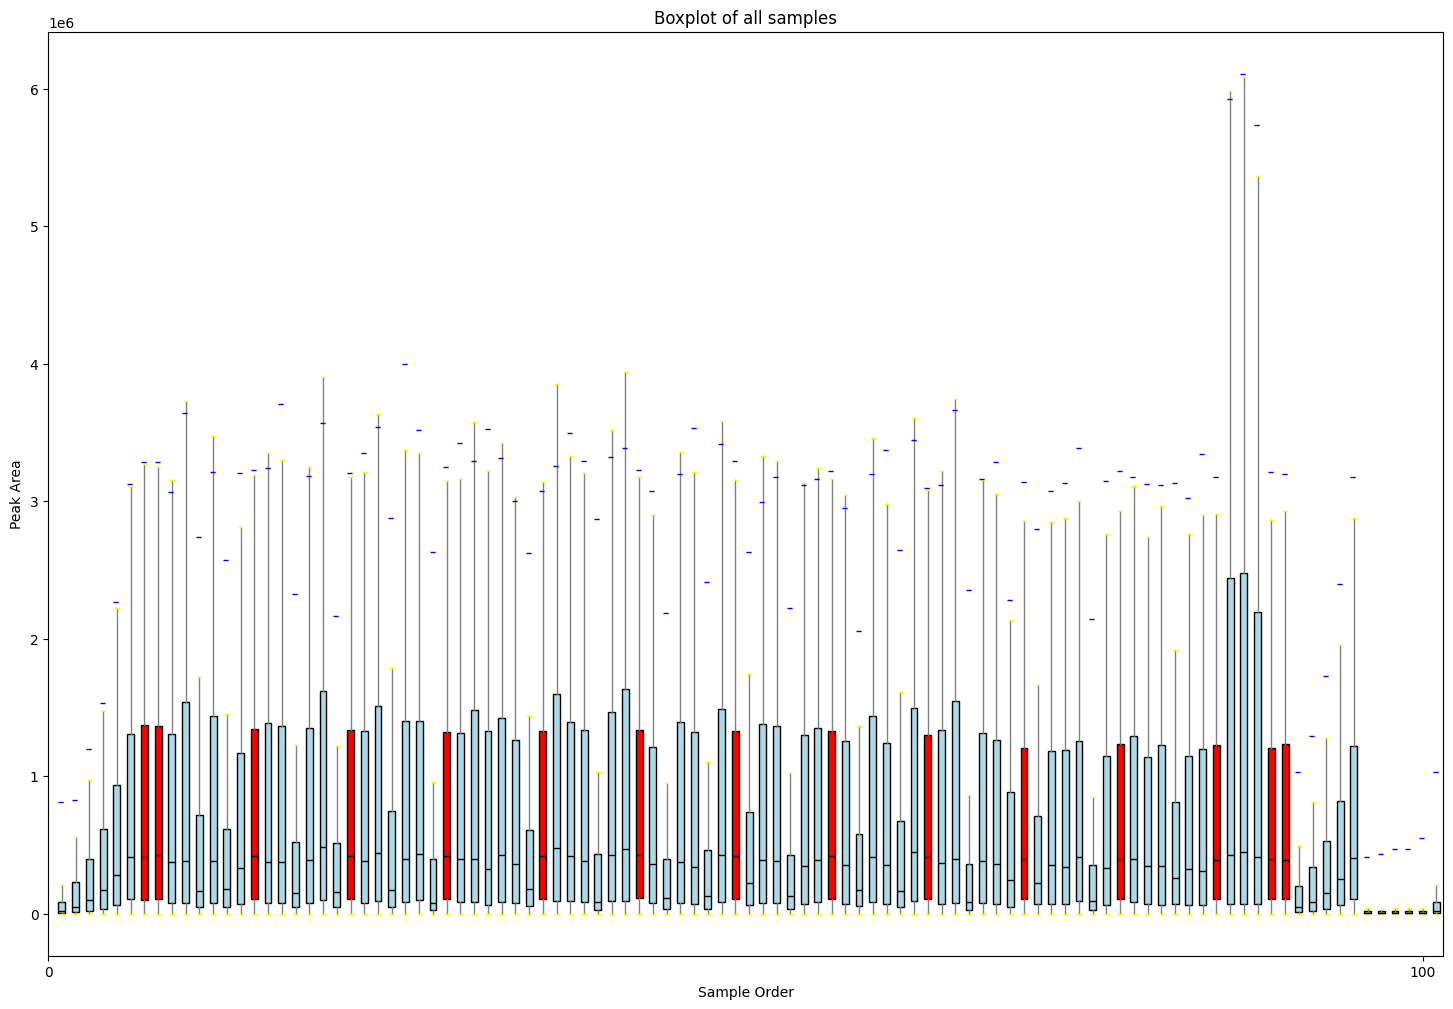

(<Figure size 1800x1200 with 1 Axes>,
 <Axes: title={'center': 'Boxplot of all samples'}, xlabel='Sample Order', ylabel='Peak Area'>)

In [11]:
# Visualize whole dataset as boxplot
wf.visualizer_boxplot()

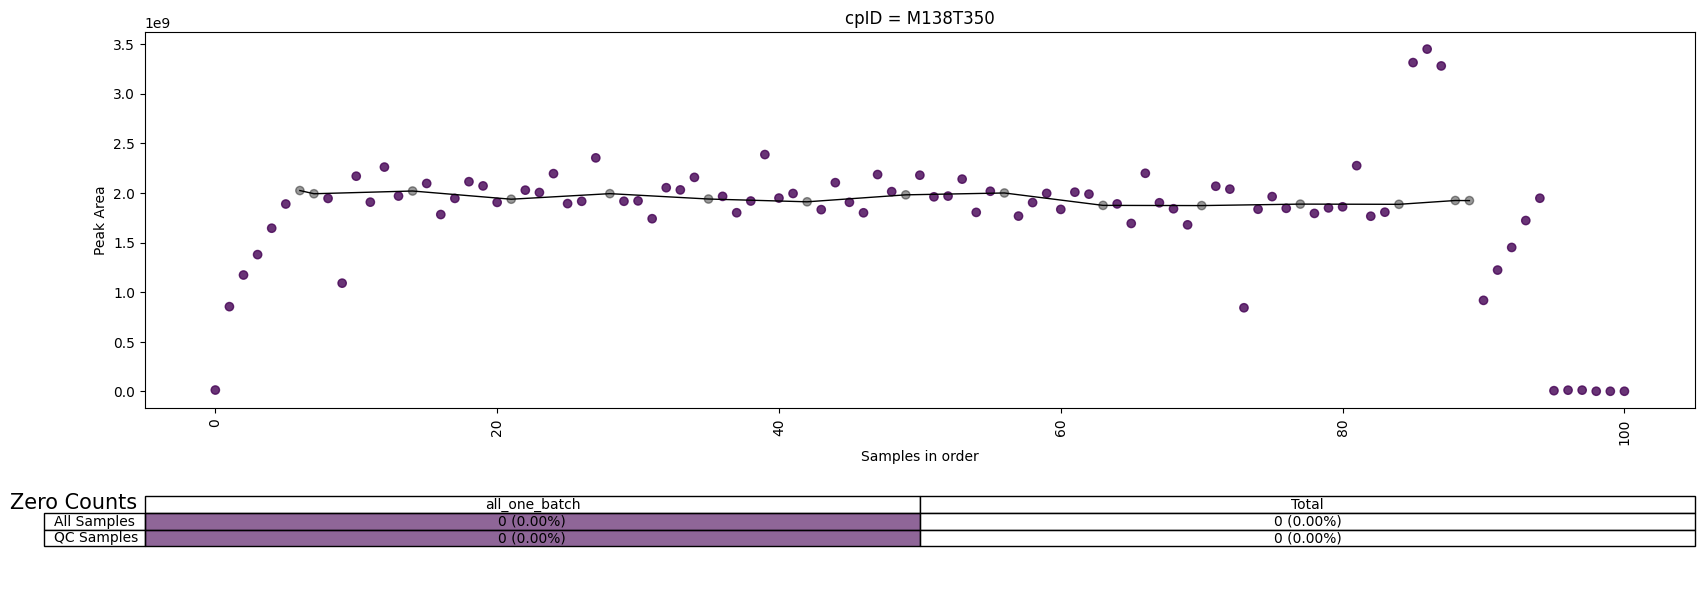

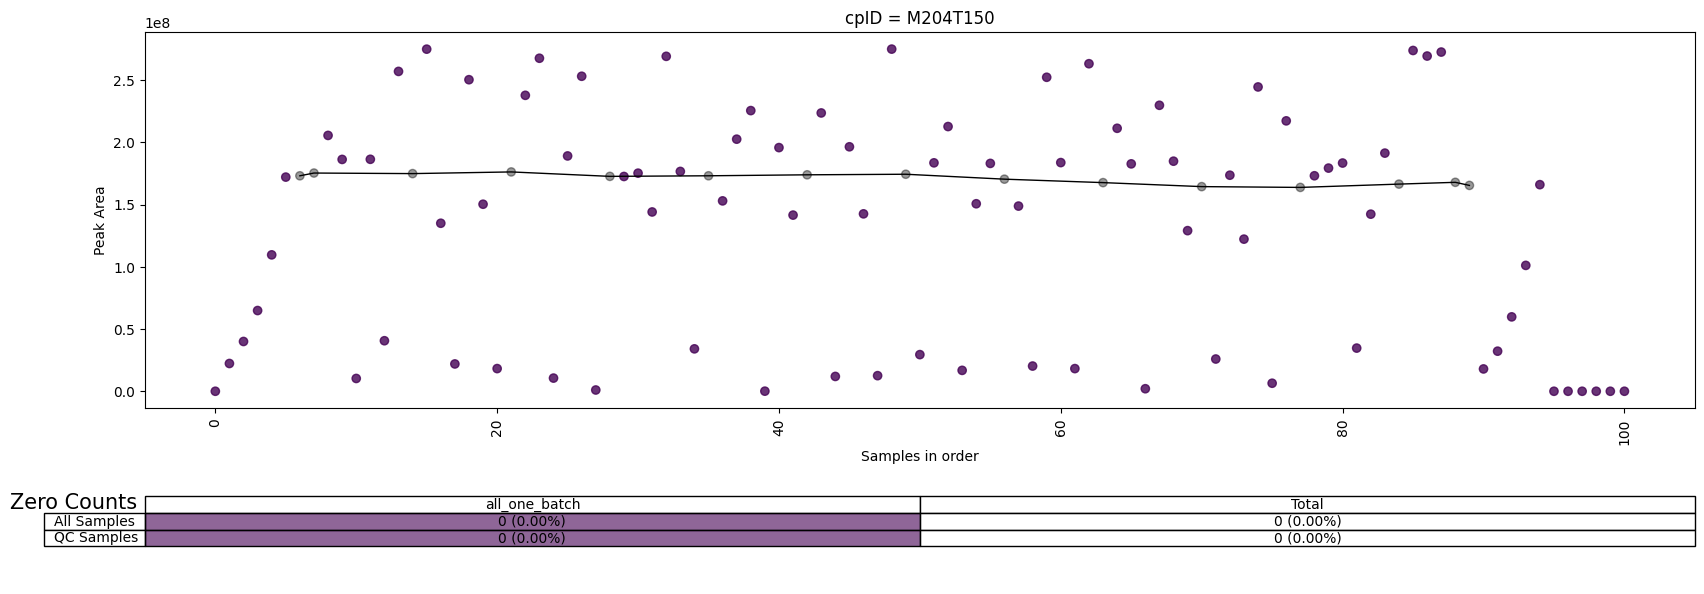

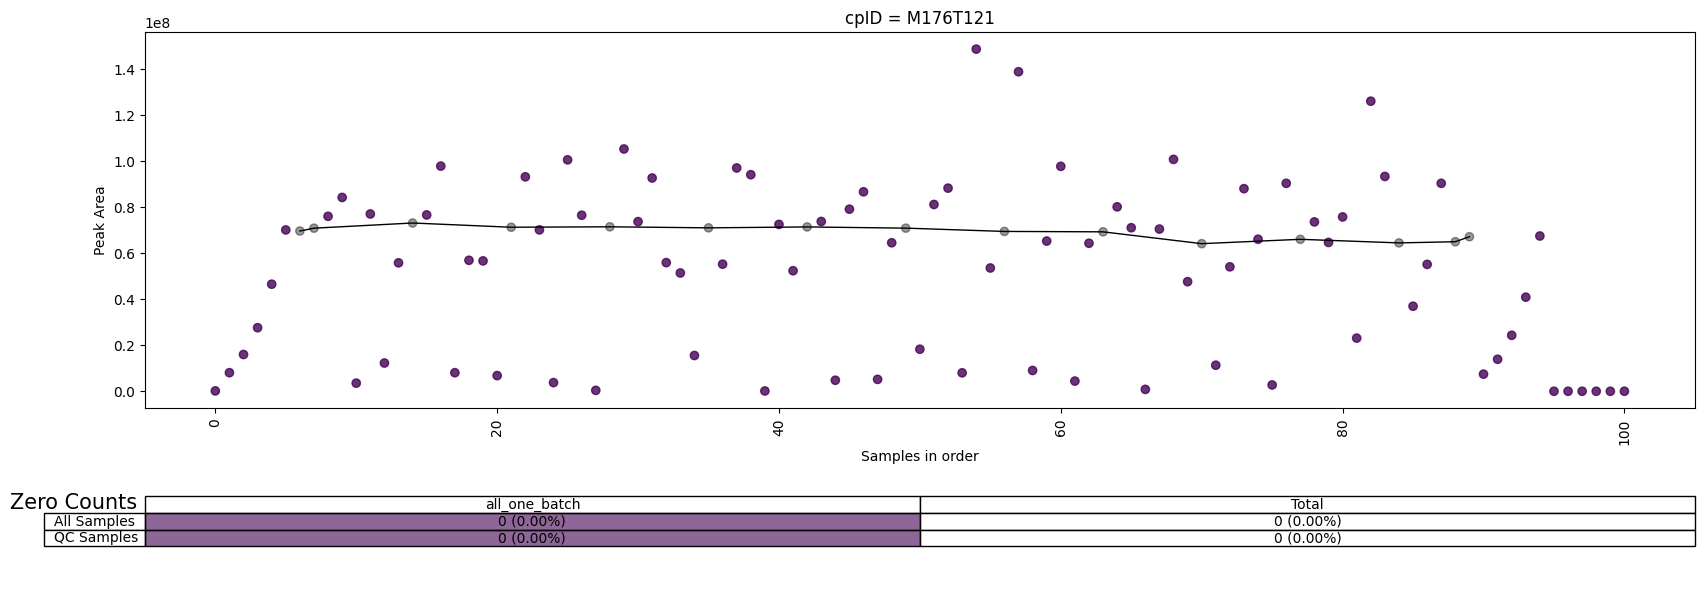

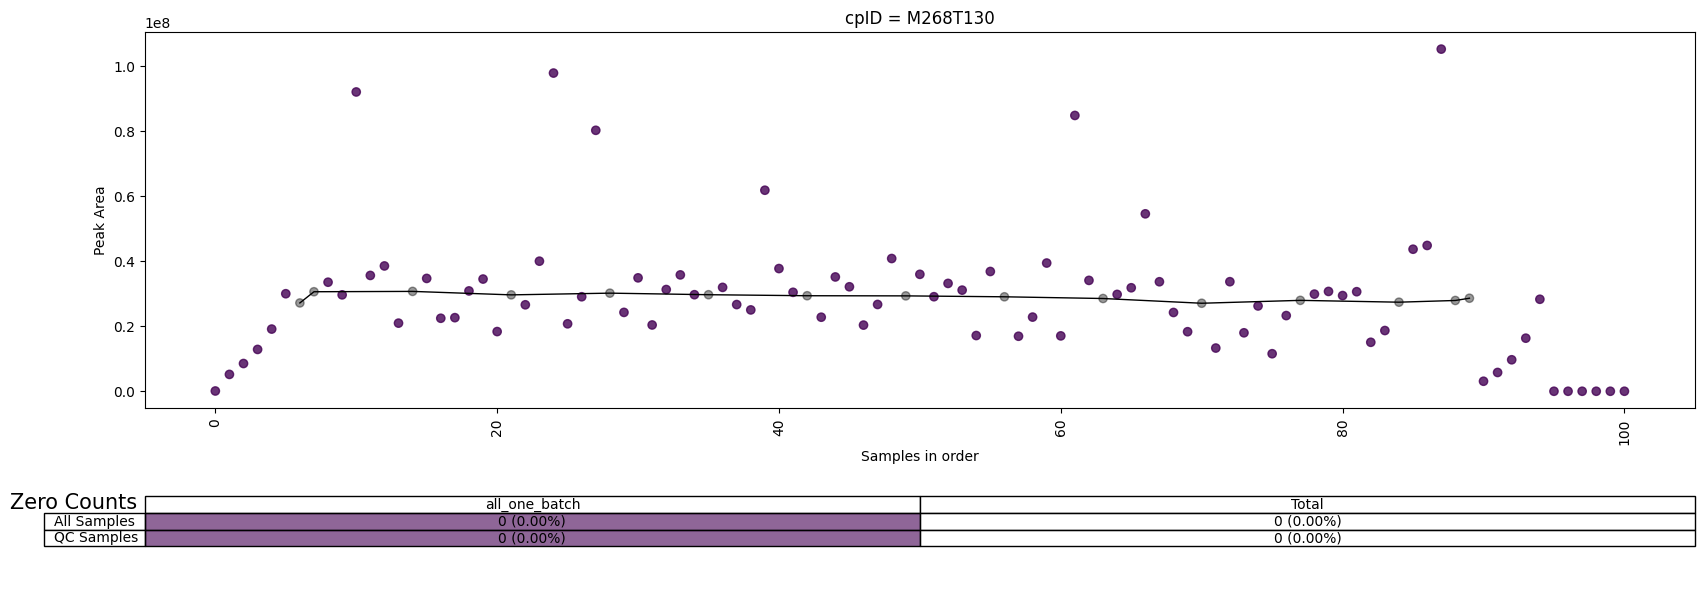

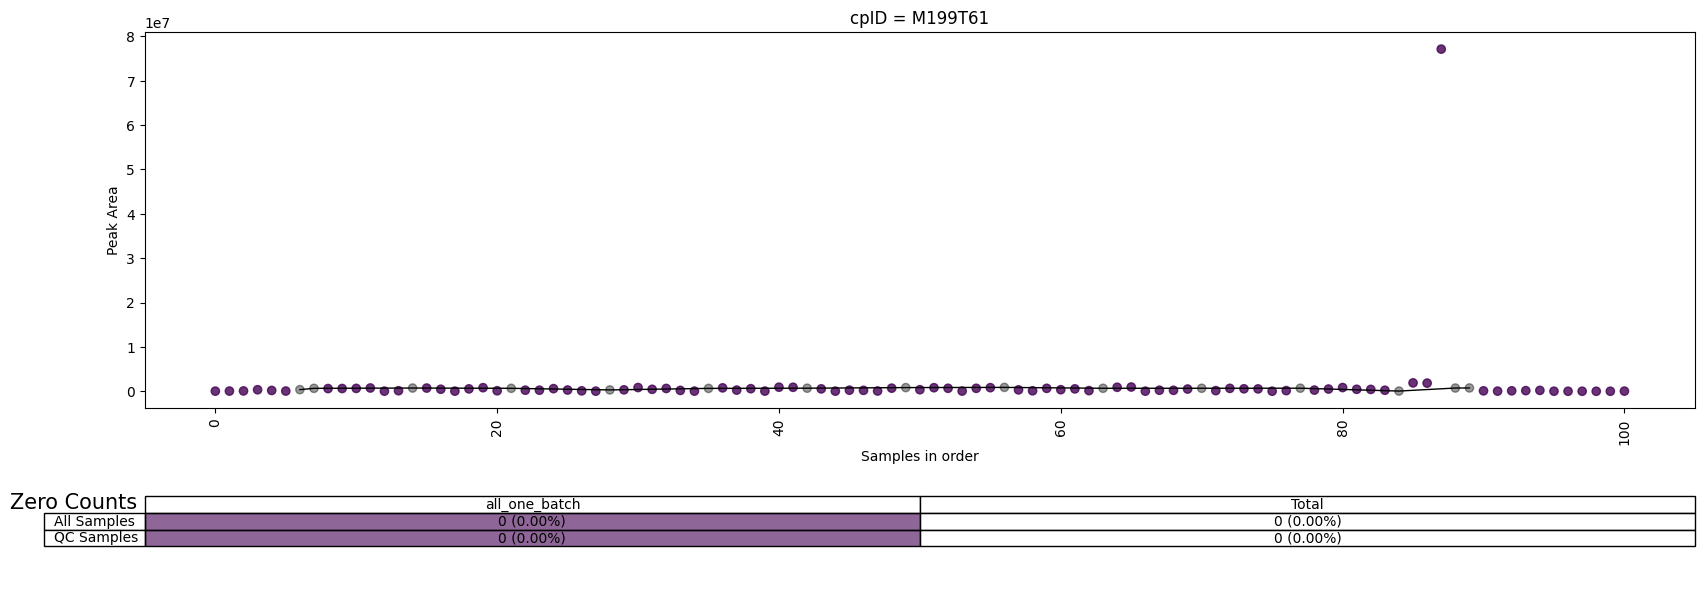

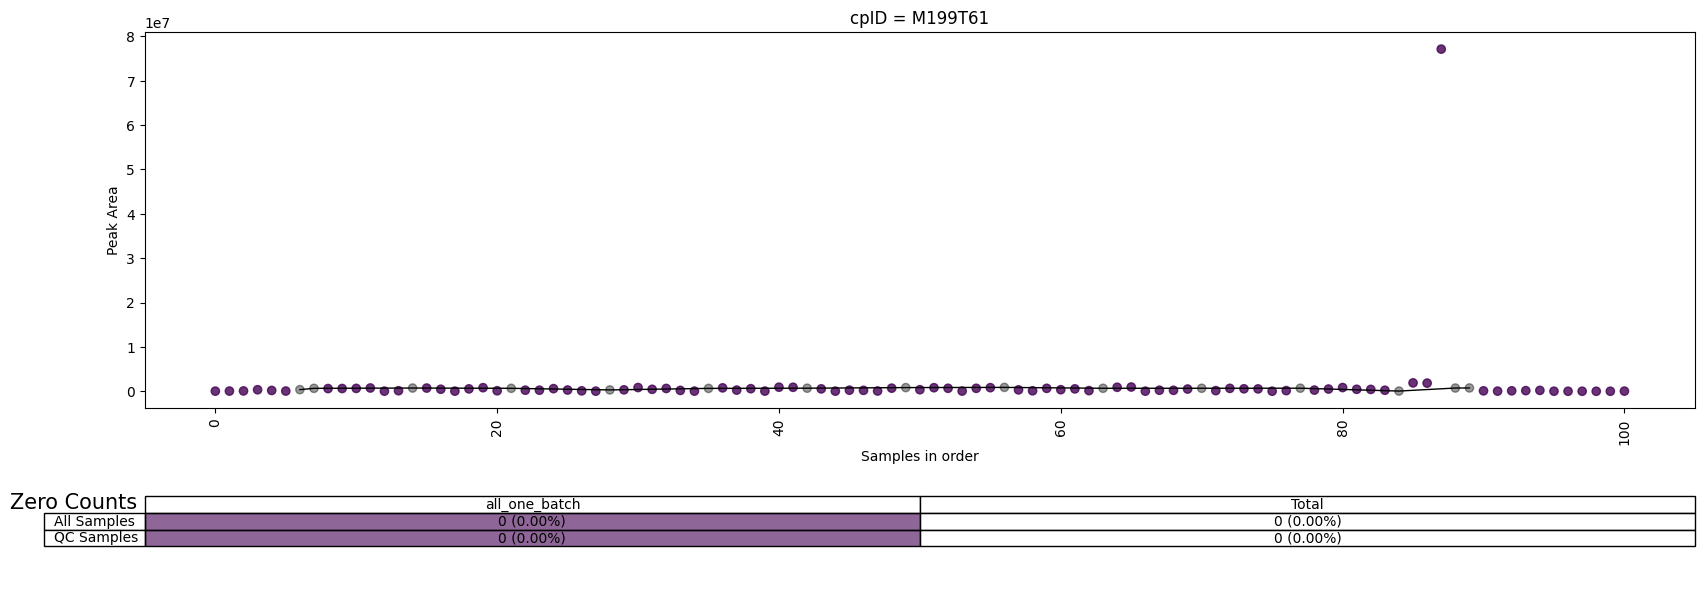

In [12]:
# Visualize samples by batches (if you have batches, else will be all in one color)
wf.visualizer_samples_by_batch(show = 'default', cmap = 'viridis')

### Systematic error and Batch effect correction

In [13]:
# Filter features with low intensity based on the blank samples
wf.filter_blank_intensity_ratio(ratio = 20, setting = 'first')
# Show data
wf.data

Number of features removed: 3399 ;being: [10, 15, 16, 20, 21, 26, 27, 28, 29, 35, 36, 39, 42, 45, 46, 48, 49, 54, 55, 57, 58, 59, 60, 62, 63, 64, 65, 69, 70, 77, 87, 88, 92, 94, 105, 106, 107, 109, 110, 113, 122, 123, 124, 125, 126, 131, 133, 137, 138, 146, 154, 156, 168, 185, 193, 195, 197, 198, 203, 215, 217, 224, 231, 235, 236, 250, 251, 254, 255, 256, 259, 264, 267, 268, 274, 280, 282, 291, 295, 299, 310, 312, 316, 318, 322, 324, 330, 332, 337, 340, 346, 347, 349, 350, 352, 357, 362, 364, 367, 384, 386, 387, 392, 395, 397, 398, 402, 403, 404, 405, 407, 409, 419, 420, 423, 427, 432, 444, 448, 449, 450, 451, 457, 463, 466, 468, 469, 473, 475, 479, 480, 488, 489, 490, 492, 494, 495, 496, 503, 506, 509, 511, 513, 514, 517, 521, 523, 530, 531, 532, 535, 537, 539, 544, 545, 548, 550, 557, 558, 559, 561, 567, 568, 571, 572, 573, 575, 581, 583, 584, 585, 586, 588, 590, 593, 599, 605, 608, 614, 615, 624, 630, 631, 636, 638, 642, 645, 646, 647, 649, 651, 653, 654, 667, 680, 682, 684, 689, 69

,cpdID,Area: BLANK01_POS.raw (F7),Area: dQC625_01_POS.raw (F28),Area: dQC125_01_POS.raw (F26),Area: dQC25_01_POS.raw (F20),Area: dQC50_01_POS.raw (F22),Area: dQC100_01_POS.raw (F24),Area: QC11_POS.raw (F97),Area: QC12_POS.raw (F98),Area: EY_Ol_02_R_POS.raw (F48),...,Area: dQC125_02_POS.raw (F27),Area: dQC25_02_POS.raw (F21),Area: dQC50_02_POS.raw (F23),Area: dQC100_02_POS.raw (F25),Area: dIS625_POS.raw (F19),Area: dIS125_POS.raw (F18),Area: dIS25_POS.raw (F15),Area: dIS50_POS.raw (F16),Area: dIS100_POS.raw (F17),Area: BLANK02_POS.raw (F8)
0,M138T350,1.441664e+07,8.541340e+08,1.172623e+09,1.378106e+09,1.643918e+09,1.887580e+09,2.023172e+09,1.990985e+09,1.943874e+09,...,1.222383e+09,1.450101e+09,1.721176e+09,1.945950e+09,7.972386e+06,1.301456e+07,1.344040e+07,2.384493e+06,2.182257e+06,2.250933e+06
1,M195T46,2.554504e+06,1.572669e+08,2.147106e+08,2.862703e+08,4.174757e+08,5.688577e+08,6.364744e+08,6.266685e+08,5.796860e+08,...,2.058392e+08,3.020778e+08,4.287956e+08,6.303846e+08,1.091908e+06,6.464775e+05,4.853303e+05,4.206629e+05,3.312217e+05,4.652319e+05
2,M195T46_1,2.554504e+06,1.572669e+08,2.147106e+08,2.862703e+08,4.174757e+08,5.688577e+08,6.364744e+08,6.266685e+08,5.796860e+08,...,2.058392e+08,3.020778e+08,4.287956e+08,6.303846e+08,1.322549e+06,7.896353e+05,5.935679e+05,5.087824e+05,4.104123e+05,4.652319e+05
3,M195T45,2.554504e+06,1.572669e+08,2.147106e+08,2.862703e+08,4.174757e+08,5.688577e+08,6.364744e+08,6.266685e+08,5.796860e+08,...,2.058392e+08,3.020778e+08,4.287956e+08,6.303846e+08,9.882808e+05,5.902034e+05,4.346673e+05,3.845191e+05,2.964283e+05,4.652319e+05
4,M94T225,3.206810e+06,1.188683e+08,3.514359e+08,4.512481e+08,4.248412e+08,7.745688e+08,8.116503e+08,7.594620e+08,6.506121e+08,...,1.052682e+08,4.312063e+08,5.526199e+08,7.331560e+08,3.190665e+06,2.626148e+06,2.251301e+06,2.224399e+06,2.252262e+06,4.143978e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2727,M363T312,1.834692e+03,4.977226e+03,1.468439e+04,3.089526e+04,5.308566e+04,7.691442e+04,9.179119e+04,7.479215e+04,1.212003e+05,...,9.503041e+03,2.028139e+04,3.833944e+04,6.432460e+04,1.534888e+03,1.461925e+03,1.547092e+03,1.472972e+03,1.584371e+03,1.461626e+03
2728,M303T340,2.658524e+03,3.076008e+03,4.713921e+03,2.724455e+04,3.586663e+04,1.240635e+05,7.920865e+04,1.186703e+05,1.347649e+05,...,3.031667e+03,4.179781e+03,2.249283e+04,7.075659e+04,2.076300e+03,2.113715e+03,2.101733e+03,1.942815e+03,2.144360e+03,2.124200e+03
2729,M264T311,2.838159e+03,3.109662e+03,6.156928e+03,3.030866e+04,4.604686e+04,1.085575e+05,1.629522e+05,9.700726e+04,1.058867e+05,...,3.093094e+03,1.501085e+04,2.776839e+04,6.656698e+04,2.287484e+03,2.094304e+03,2.258064e+03,2.147464e+03,2.369725e+03,2.183968e+03
2730,M186T340,2.836169e+03,4.387251e+03,1.097583e+04,3.513513e+04,5.139563e+04,5.147636e+04,7.507356e+04,5.413796e+04,1.814546e+04,...,6.709943e+03,1.597341e+04,1.110759e+04,3.255668e+04,2.559999e+03,2.253800e+03,2.242172e+03,2.230265e+03,2.287648e+03,2.222185e+03


In [14]:
# Filter out (delete) blank samples (we don't need them anymore)
wf.filter_out_blanks()
# Show data
wf.data

Blank samples were removed from the data.


,cpdID,Area: dQC625_01_POS.raw (F28),Area: dQC125_01_POS.raw (F26),Area: dQC25_01_POS.raw (F20),Area: dQC50_01_POS.raw (F22),Area: dQC100_01_POS.raw (F24),Area: QC11_POS.raw (F97),Area: QC12_POS.raw (F98),Area: EY_Ol_02_R_POS.raw (F48),Area: B_K_02_R_POS.raw (F2),...,Area: dQC625_02_POS.raw (F29),Area: dQC125_02_POS.raw (F27),Area: dQC25_02_POS.raw (F21),Area: dQC50_02_POS.raw (F23),Area: dQC100_02_POS.raw (F25),Area: dIS625_POS.raw (F19),Area: dIS125_POS.raw (F18),Area: dIS25_POS.raw (F15),Area: dIS50_POS.raw (F16),Area: dIS100_POS.raw (F17)
0,M138T350,8.541340e+08,1.172623e+09,1.378106e+09,1.643918e+09,1.887580e+09,2.023172e+09,1.990985e+09,1.943874e+09,1.090622e+09,...,9.175130e+08,1.222383e+09,1.450101e+09,1.721176e+09,1.945950e+09,7.972386e+06,1.301456e+07,1.344040e+07,2.384493e+06,2.182257e+06
1,M195T46,1.572669e+08,2.147106e+08,2.862703e+08,4.174757e+08,5.688577e+08,6.364744e+08,6.266685e+08,5.796860e+08,6.675881e+08,...,1.433006e+08,2.058392e+08,3.020778e+08,4.287956e+08,6.303846e+08,1.091908e+06,6.464775e+05,4.853303e+05,4.206629e+05,3.312217e+05
2,M195T46_1,1.572669e+08,2.147106e+08,2.862703e+08,4.174757e+08,5.688577e+08,6.364744e+08,6.266685e+08,5.796860e+08,6.675881e+08,...,1.433006e+08,2.058392e+08,3.020778e+08,4.287956e+08,6.303846e+08,1.322549e+06,7.896353e+05,5.935679e+05,5.087824e+05,4.104123e+05
3,M195T45,1.572669e+08,2.147106e+08,2.862703e+08,4.174757e+08,5.688577e+08,6.364744e+08,6.266685e+08,5.796860e+08,6.675881e+08,...,1.433006e+08,2.058392e+08,3.020778e+08,4.287956e+08,6.303846e+08,9.882808e+05,5.902034e+05,4.346673e+05,3.845191e+05,2.964283e+05
4,M94T225,1.188683e+08,3.514359e+08,4.512481e+08,4.248412e+08,7.745688e+08,8.116503e+08,7.594620e+08,6.506121e+08,9.473518e+08,...,2.325360e+08,1.052682e+08,4.312063e+08,5.526199e+08,7.331560e+08,3.190665e+06,2.626148e+06,2.251301e+06,2.224399e+06,2.252262e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2727,M363T312,4.977226e+03,1.468439e+04,3.089526e+04,5.308566e+04,7.691442e+04,9.179119e+04,7.479215e+04,1.212003e+05,7.312842e+04,...,1.758180e+03,9.503041e+03,2.028139e+04,3.833944e+04,6.432460e+04,1.534888e+03,1.461925e+03,1.547092e+03,1.472972e+03,1.584371e+03
2728,M303T340,3.076008e+03,4.713921e+03,2.724455e+04,3.586663e+04,1.240635e+05,7.920865e+04,1.186703e+05,1.347649e+05,1.157716e+05,...,2.692760e+03,3.031667e+03,4.179781e+03,2.249283e+04,7.075659e+04,2.076300e+03,2.113715e+03,2.101733e+03,1.942815e+03,2.144360e+03
2729,M264T311,3.109662e+03,6.156928e+03,3.030866e+04,4.604686e+04,1.085575e+05,1.629522e+05,9.700726e+04,1.058867e+05,8.319093e+04,...,2.711901e+03,3.093094e+03,1.501085e+04,2.776839e+04,6.656698e+04,2.287484e+03,2.094304e+03,2.258064e+03,2.147464e+03,2.369725e+03
2730,M186T340,4.387251e+03,1.097583e+04,3.513513e+04,5.139563e+04,5.147636e+04,7.507356e+04,5.413796e+04,1.814546e+04,3.132711e+04,...,2.872693e+03,6.709943e+03,1.597341e+04,1.110759e+04,3.255668e+04,2.559999e+03,2.253800e+03,2.242172e+03,2.230265e+03,2.287648e+03


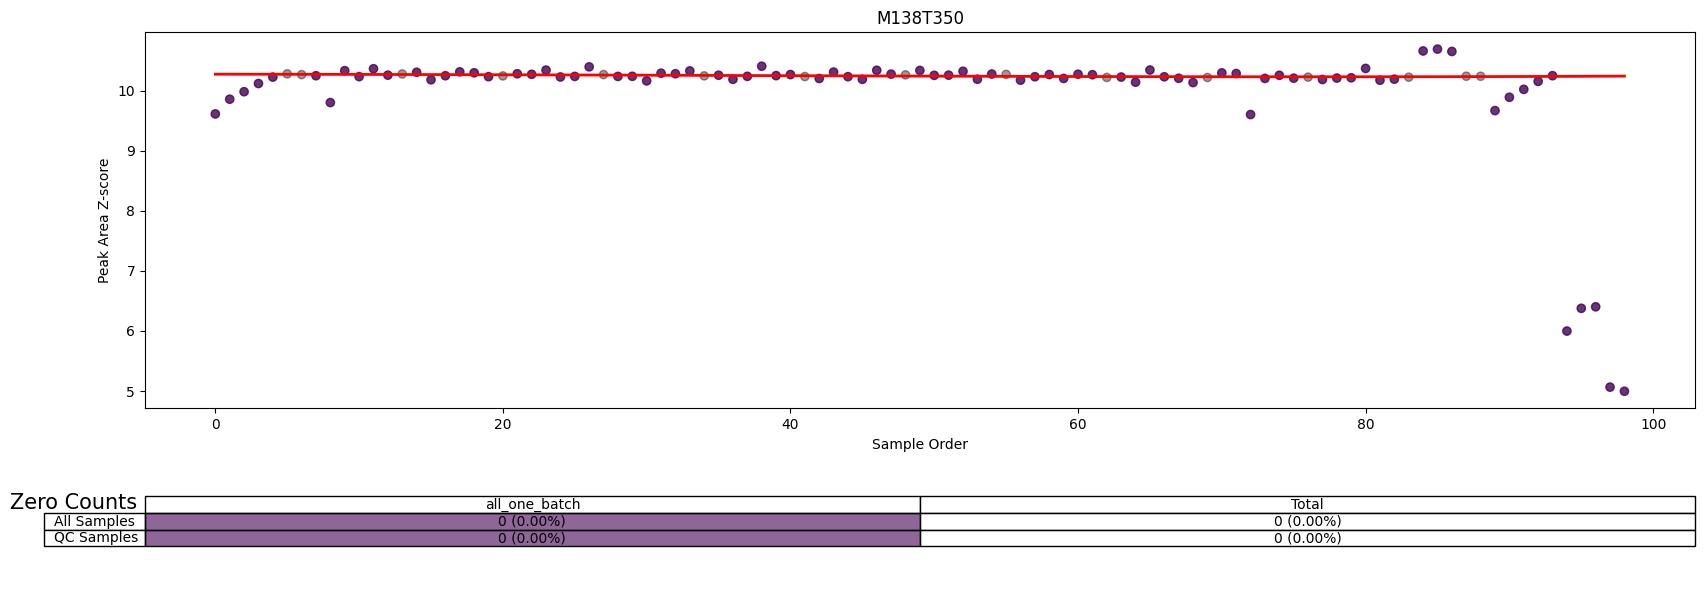

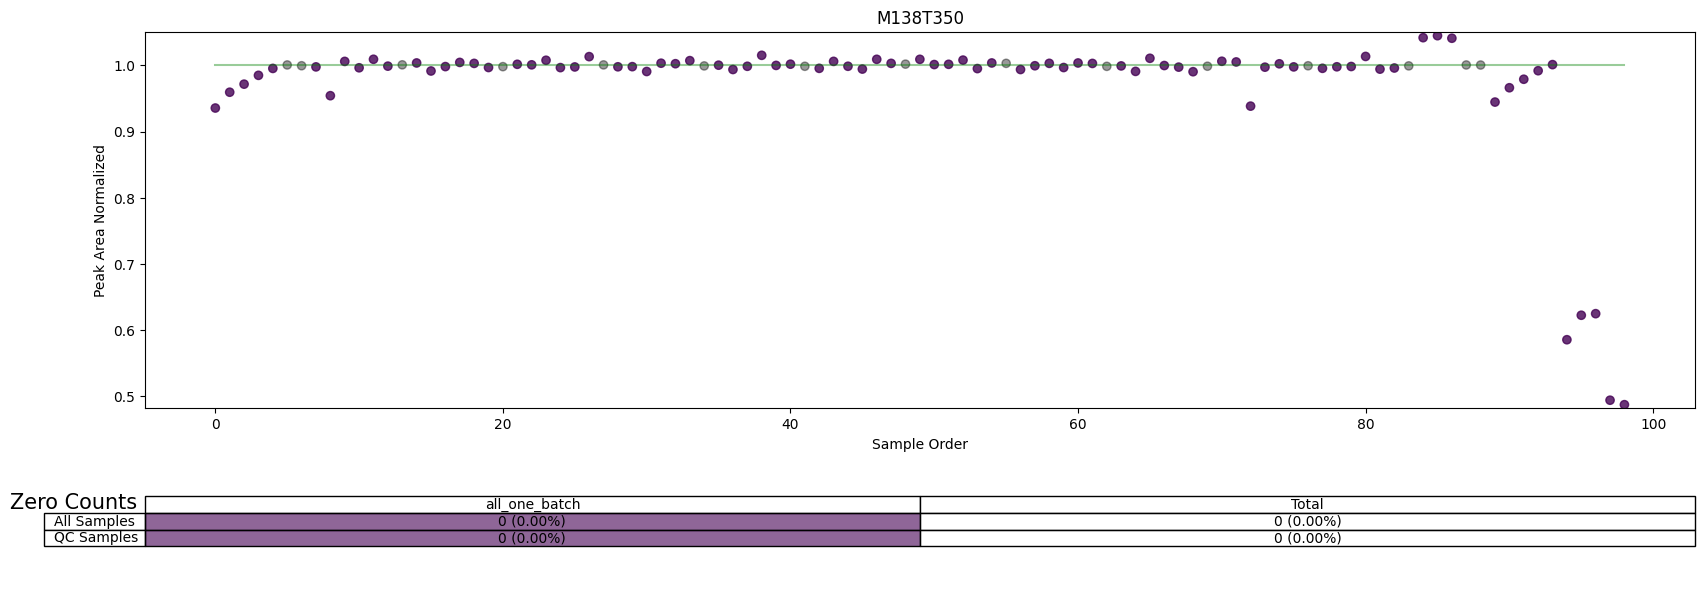

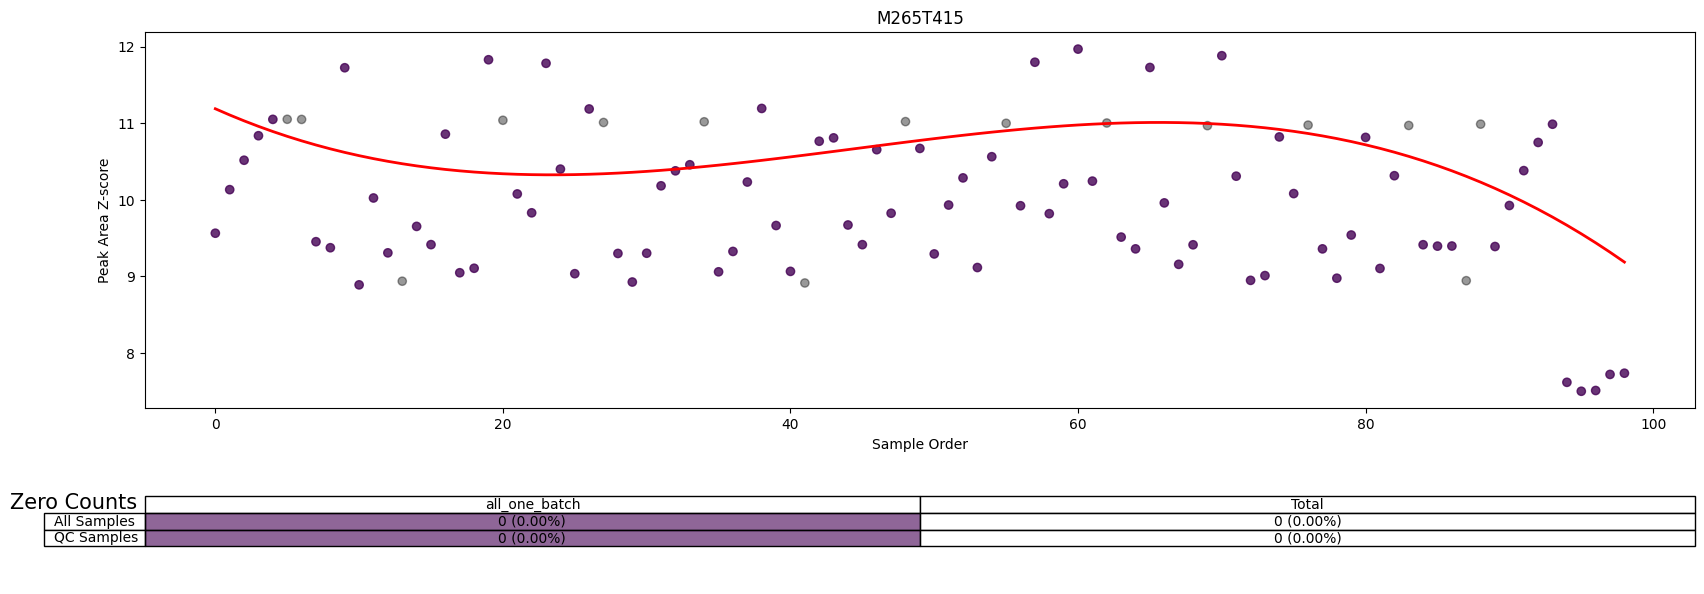

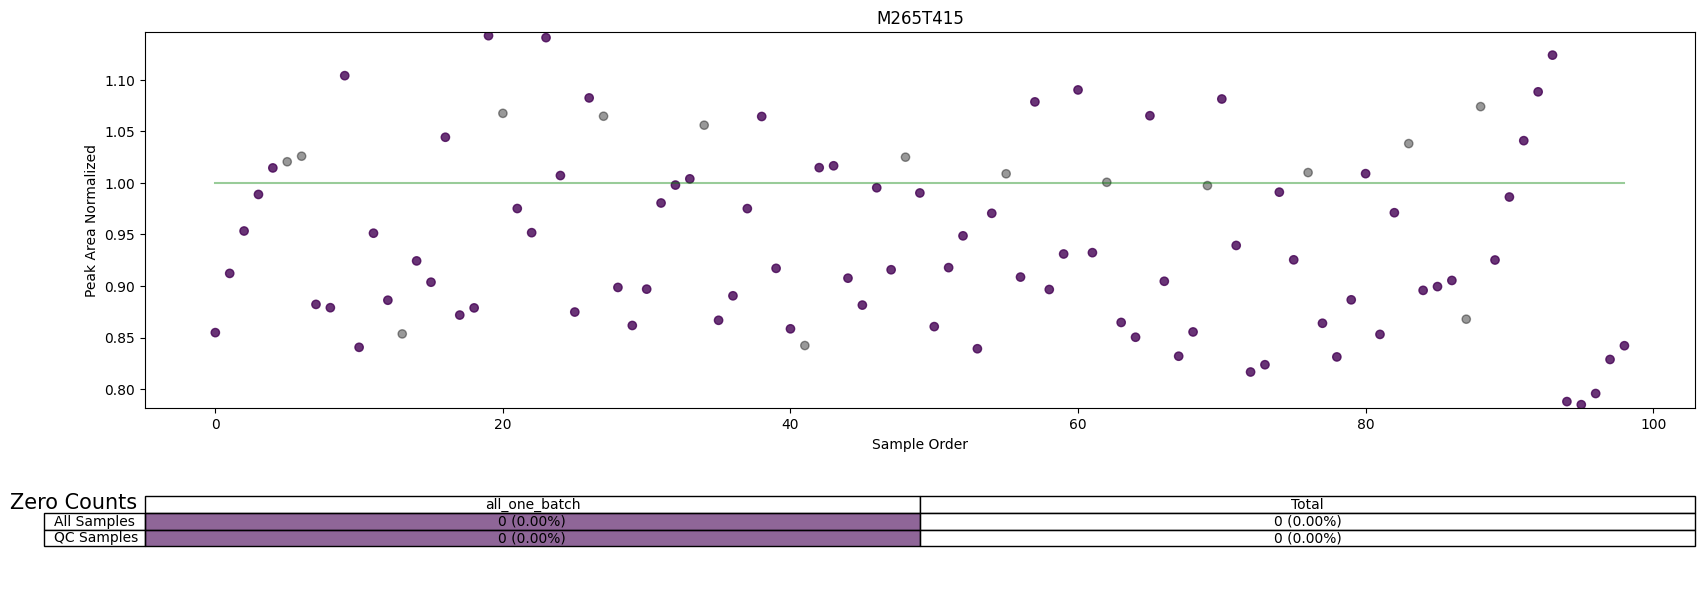

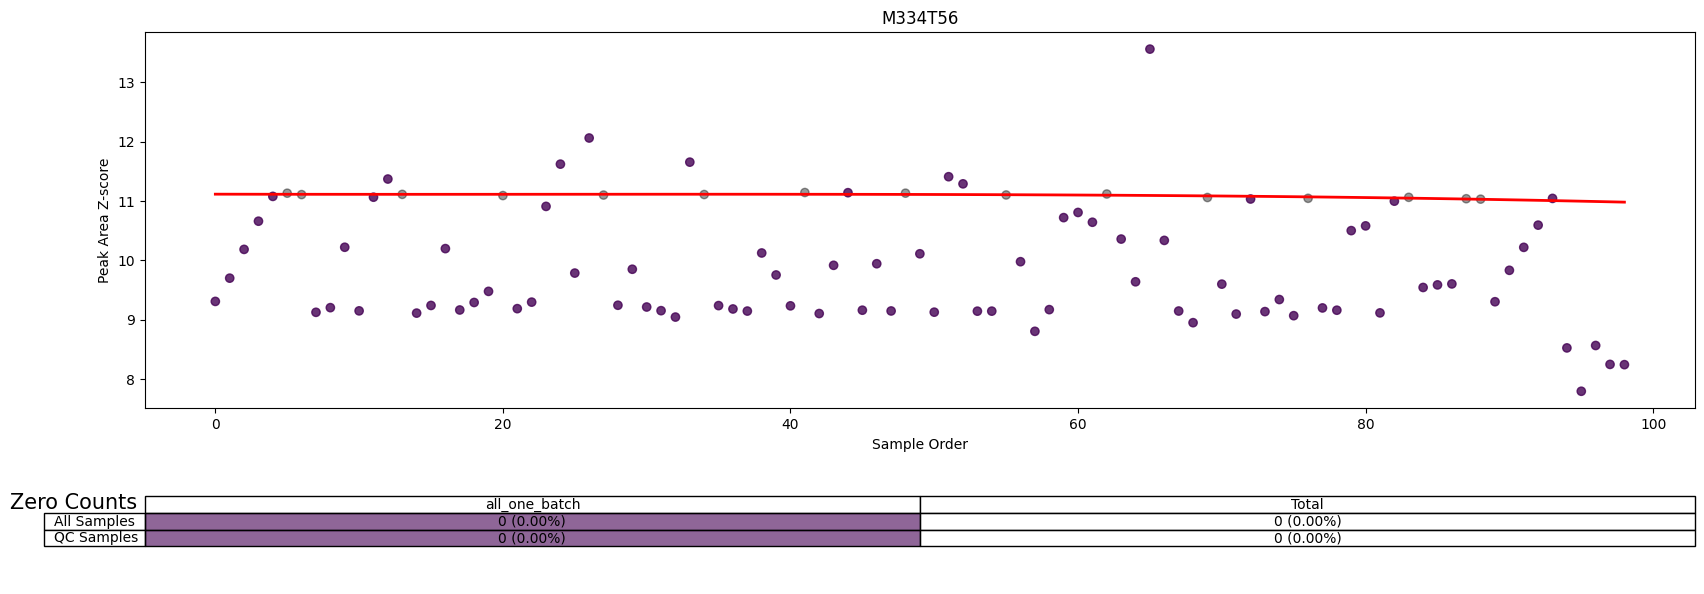

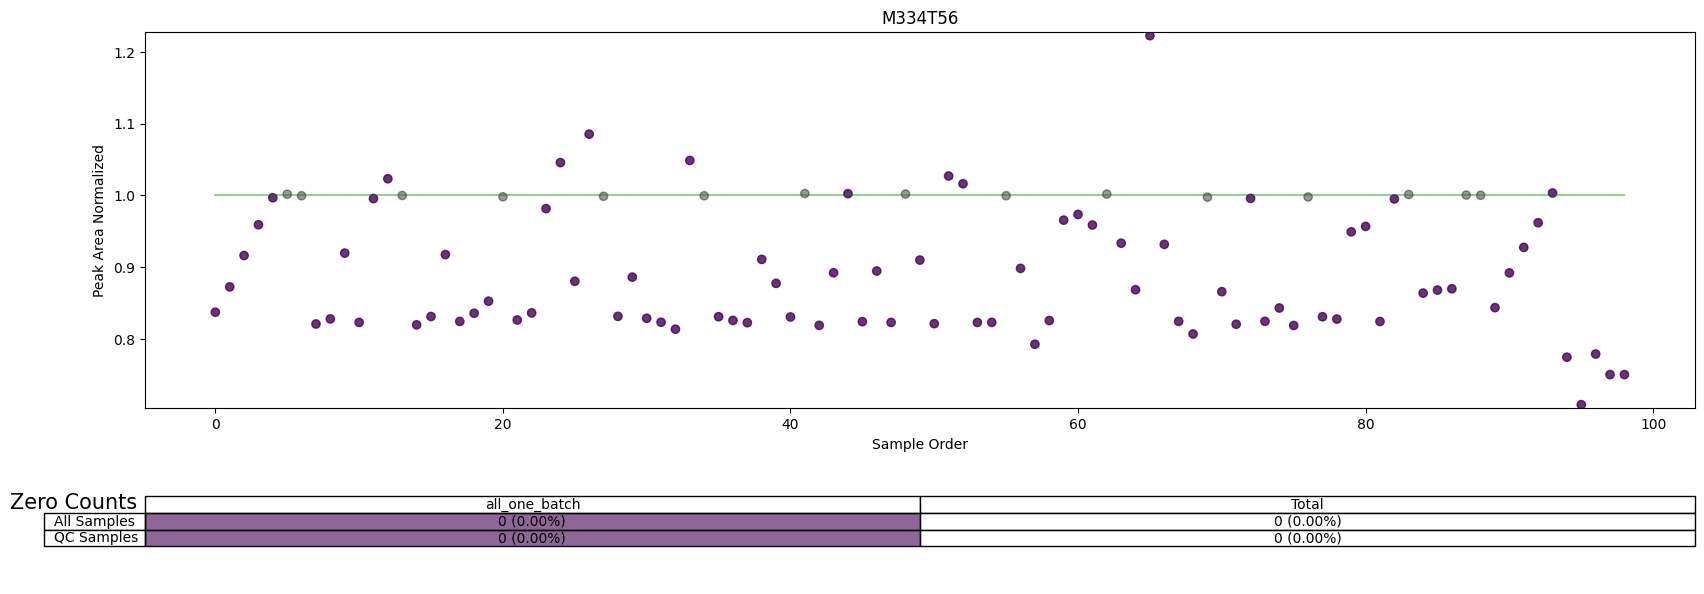

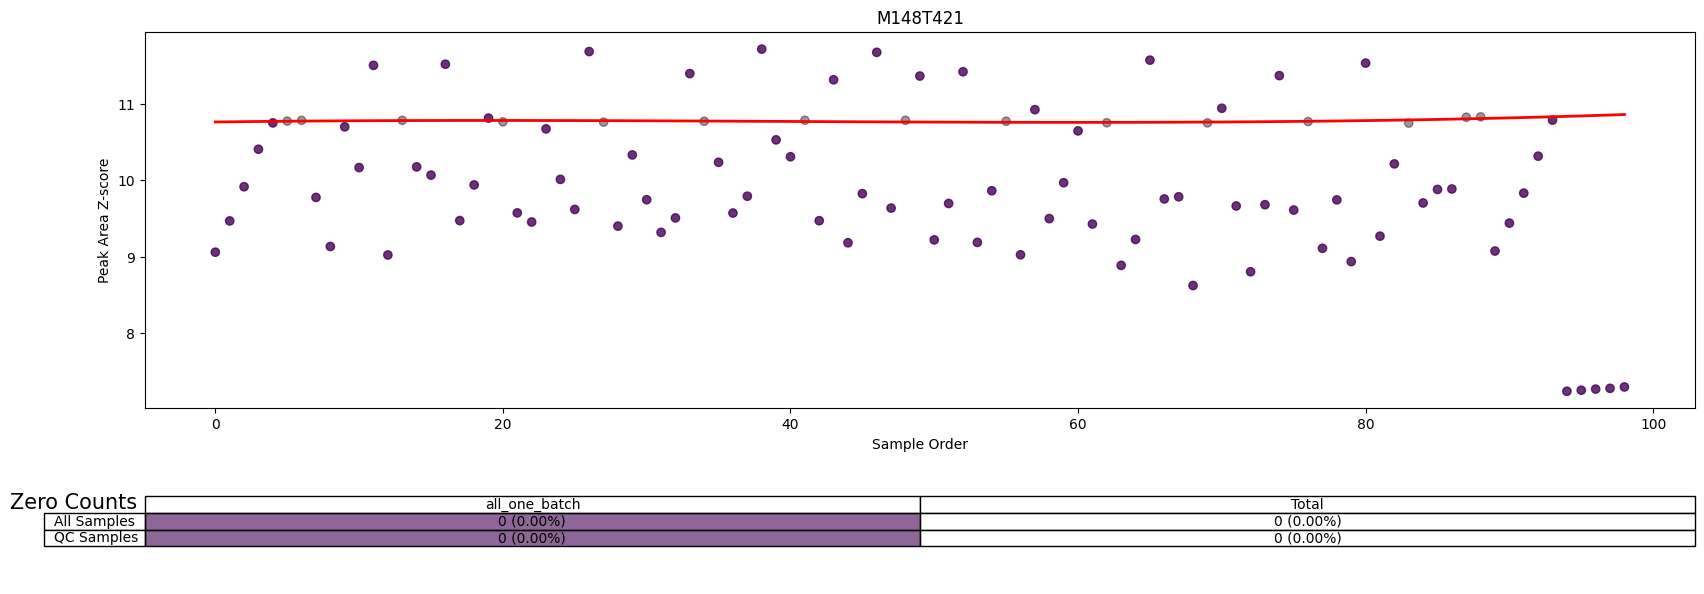

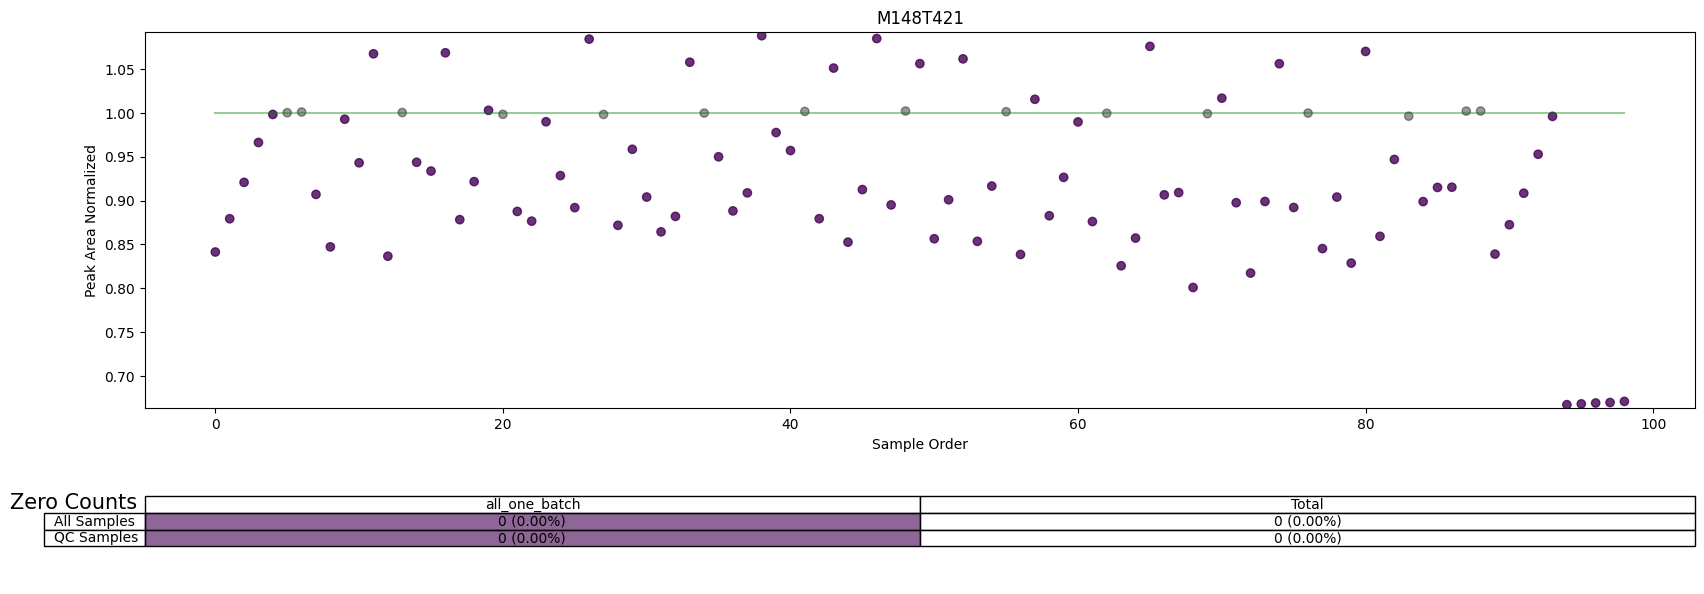

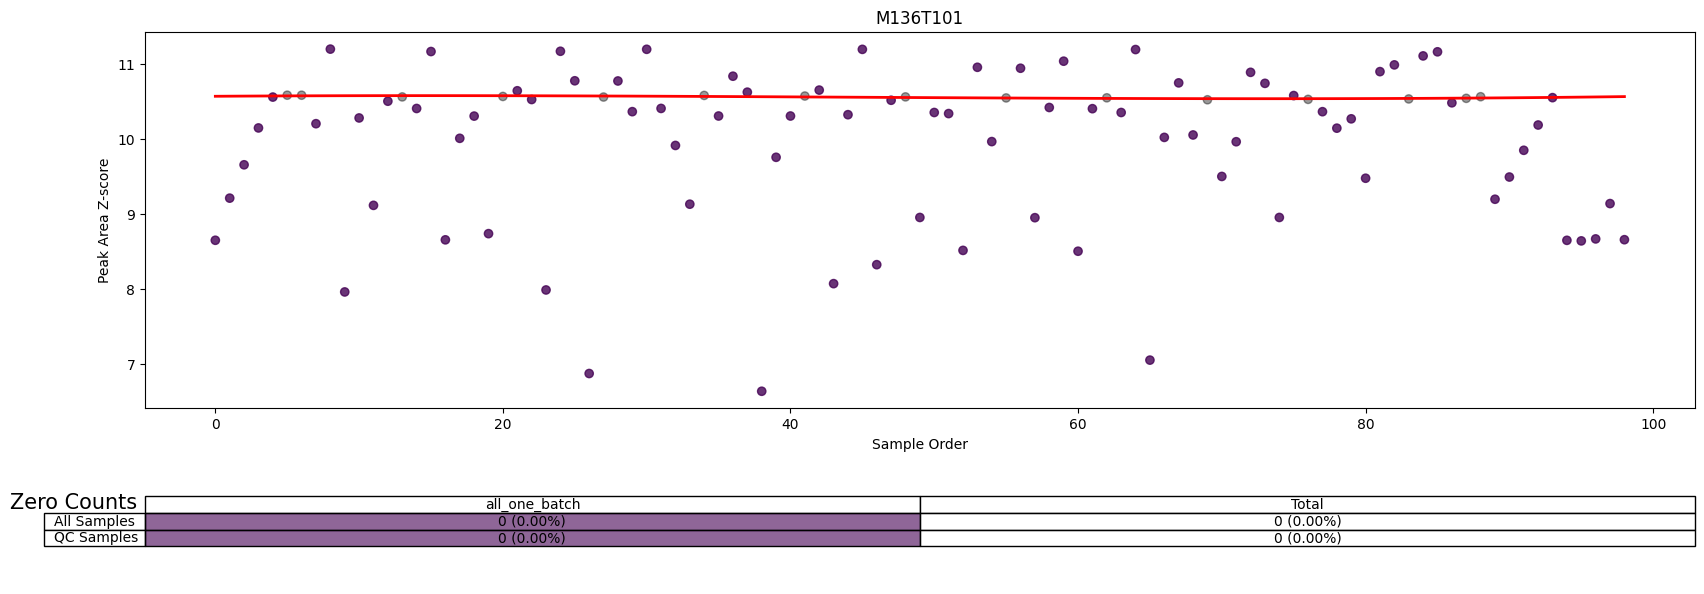

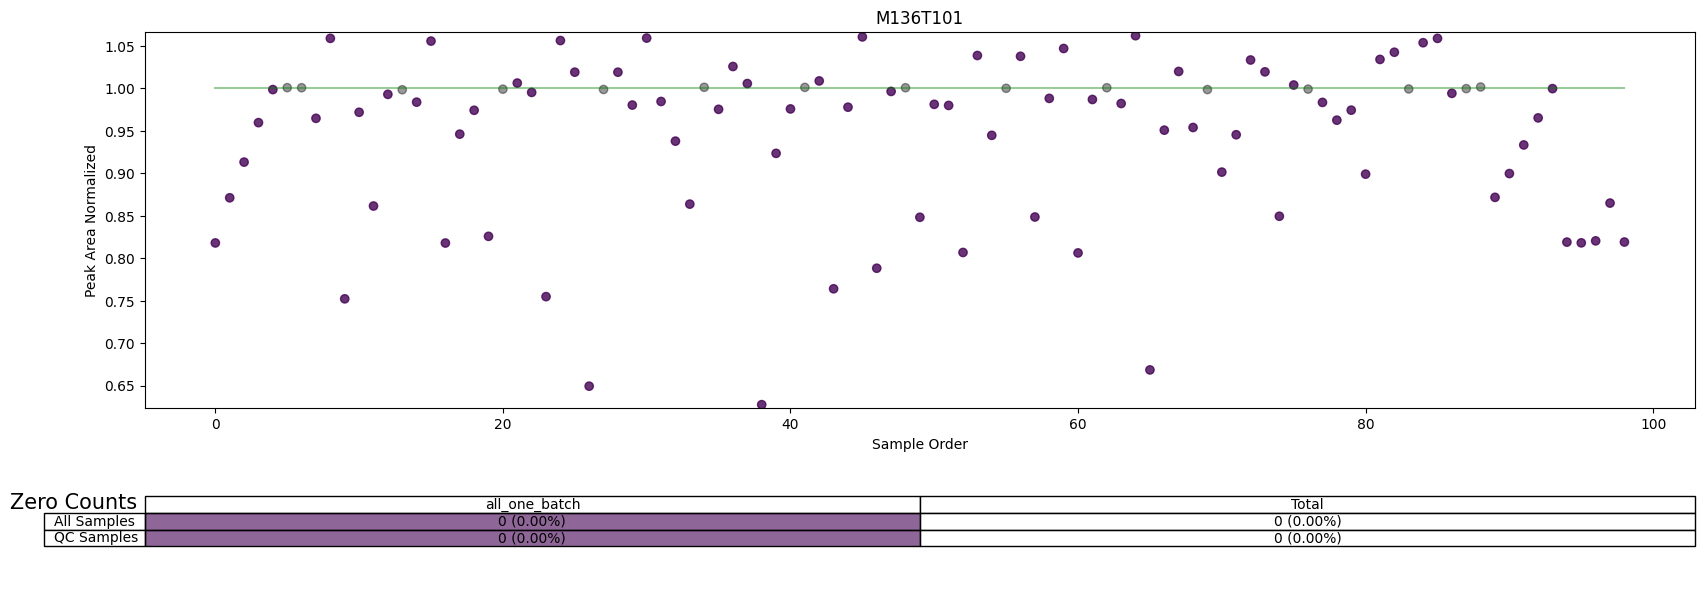

,cpdID,Area: dQC625_01_POS.raw (F28),Area: dQC125_01_POS.raw (F26),Area: dQC25_01_POS.raw (F20),Area: dQC50_01_POS.raw (F22),Area: dQC100_01_POS.raw (F24),Area: QC11_POS.raw (F97),Area: QC12_POS.raw (F98),Area: EY_Ol_02_R_POS.raw (F48),Area: B_K_02_R_POS.raw (F2),...,Area: dQC625_02_POS.raw (F29),Area: dQC125_02_POS.raw (F27),Area: dQC25_02_POS.raw (F21),Area: dQC50_02_POS.raw (F23),Area: dQC100_02_POS.raw (F25),Area: dIS625_POS.raw (F19),Area: dIS125_POS.raw (F18),Area: dIS25_POS.raw (F15),Area: dIS50_POS.raw (F16),Area: dIS100_POS.raw (F17)
0,M138T350,20645.733866,21147.606216,21408.253750,21696.673777,21925.603053,22041.799790,22015.802426,21976.725563,21036.228623,...,20833.356656,21291.501061,21568.438075,21849.729454,22052.870574,14520.765586,15070.966882,15107.019898,13246.304386,13156.751869
1,M195T46,20293.749764,20673.625485,21030.811963,21508.826436,21908.760585,22055.287373,22034.118391,21931.175826,22115.822067,...,20171.449652,20613.578198,21092.515062,21539.954555,22043.113616,15086.851832,14623.461576,14376.467745,14255.349562,14054.463788
2,M195T46_1,20251.784183,20640.546469,21006.253135,21495.913980,21905.803290,22056.025148,22034.321453,21928.784049,22118.094851,...,20126.685979,20579.095663,21069.448519,21527.809683,22043.540519,15119.452430,14651.039963,14398.519492,14264.445994,14079.209414
3,M195T45,20314.183743,20689.726839,21042.762287,21515.107062,21910.198635,22054.928853,22034.019837,21932.338923,22114.717366,...,20193.248959,20630.363863,21103.738720,21545.861674,22042.906178,15068.359760,14618.578062,14358.437436,14256.088795,14040.133824
4,M94T225,19422.430599,20888.064976,21237.707777,21147.237304,22014.860543,22080.097527,21977.881124,21747.105660,22300.400449,...,20455.097235,19384.279950,21328.544077,21689.257866,22107.547983,15290.243716,15088.841494,14931.134989,14917.850938,14929.179920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2727,M363T312,18278.003223,19657.044084,20663.339927,21426.612406,21964.364919,22223.552081,21915.461122,22636.650896,21876.672498,...,17360.037227,19513.811561,20570.353446,21503.284051,22293.965775,17217.690880,17163.216546,17234.020946,17178.663197,17268.694143
2728,M303T340,16989.168726,17560.172512,20257.111718,20667.778947,22833.218076,21949.653737,22635.360997,22820.123732,22491.213928,...,17218.505791,17393.949166,17878.698370,20658.964869,22789.734694,16818.512792,16836.280836,16818.507606,16694.494581,16823.703425
2729,M264T311,16924.602098,17791.281826,19911.812777,20570.970647,21908.709532,22621.939585,21904.220598,22117.209384,21821.460620,...,17708.036050,17902.785131,20125.871209,21092.287370,22537.472643,17624.149475,17542.822865,17676.171080,17648.294868,17818.660915
2730,M186T340,18269.751128,19821.289383,22000.512560,22620.823893,22436.234110,23072.157784,22211.218457,19928.087963,20849.175908,...,17600.472297,19071.993355,20681.627575,19858.846227,21932.925902,17047.736670,16756.789095,16661.875787,16562.781491,16507.478512


In [15]:
# Perform correction using QC samples for an interpolation
wf.correcter_qc_interpolation(show = 'default', p_values = 'default', use_log = True, use_norm = True, use_zeros = False, cmap  = 'viridis')

### Filter by number of corrected batches

In [16]:
# Filter features with less then 80% correctable batches (batch is not correctable if if has too many QC samples being zeros)
wf.filter_number_of_corrected_batches(0.8) 

Number of features removed: 0 ;being: [, ...


,cpdID,Area: dQC625_01_POS.raw (F28),Area: dQC125_01_POS.raw (F26),Area: dQC25_01_POS.raw (F20),Area: dQC50_01_POS.raw (F22),Area: dQC100_01_POS.raw (F24),Area: QC11_POS.raw (F97),Area: QC12_POS.raw (F98),Area: EY_Ol_02_R_POS.raw (F48),Area: B_K_02_R_POS.raw (F2),...,Area: dQC625_02_POS.raw (F29),Area: dQC125_02_POS.raw (F27),Area: dQC25_02_POS.raw (F21),Area: dQC50_02_POS.raw (F23),Area: dQC100_02_POS.raw (F25),Area: dIS625_POS.raw (F19),Area: dIS125_POS.raw (F18),Area: dIS25_POS.raw (F15),Area: dIS50_POS.raw (F16),Area: dIS100_POS.raw (F17)
0,M138T350,20645.733866,21147.606216,21408.253750,21696.673777,21925.603053,22041.799790,22015.802426,21976.725563,21036.228623,...,20833.356656,21291.501061,21568.438075,21849.729454,22052.870574,14520.765586,15070.966882,15107.019898,13246.304386,13156.751869
1,M195T46,20293.749764,20673.625485,21030.811963,21508.826436,21908.760585,22055.287373,22034.118391,21931.175826,22115.822067,...,20171.449652,20613.578198,21092.515062,21539.954555,22043.113616,15086.851832,14623.461576,14376.467745,14255.349562,14054.463788
2,M195T46_1,20251.784183,20640.546469,21006.253135,21495.913980,21905.803290,22056.025148,22034.321453,21928.784049,22118.094851,...,20126.685979,20579.095663,21069.448519,21527.809683,22043.540519,15119.452430,14651.039963,14398.519492,14264.445994,14079.209414
3,M195T45,20314.183743,20689.726839,21042.762287,21515.107062,21910.198635,22054.928853,22034.019837,21932.338923,22114.717366,...,20193.248959,20630.363863,21103.738720,21545.861674,22042.906178,15068.359760,14618.578062,14358.437436,14256.088795,14040.133824
4,M94T225,19422.430599,20888.064976,21237.707777,21147.237304,22014.860543,22080.097527,21977.881124,21747.105660,22300.400449,...,20455.097235,19384.279950,21328.544077,21689.257866,22107.547983,15290.243716,15088.841494,14931.134989,14917.850938,14929.179920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2727,M363T312,18278.003223,19657.044084,20663.339927,21426.612406,21964.364919,22223.552081,21915.461122,22636.650896,21876.672498,...,17360.037227,19513.811561,20570.353446,21503.284051,22293.965775,17217.690880,17163.216546,17234.020946,17178.663197,17268.694143
2728,M303T340,16989.168726,17560.172512,20257.111718,20667.778947,22833.218076,21949.653737,22635.360997,22820.123732,22491.213928,...,17218.505791,17393.949166,17878.698370,20658.964869,22789.734694,16818.512792,16836.280836,16818.507606,16694.494581,16823.703425
2729,M264T311,16924.602098,17791.281826,19911.812777,20570.970647,21908.709532,22621.939585,21904.220598,22117.209384,21821.460620,...,17708.036050,17902.785131,20125.871209,21092.287370,22537.472643,17624.149475,17542.822865,17676.171080,17648.294868,17818.660915
2730,M186T340,18269.751128,19821.289383,22000.512560,22620.823893,22436.234110,23072.157784,22211.218457,19928.087963,20849.175908,...,17600.472297,19071.993355,20681.627575,19858.846227,21932.925902,17047.736670,16756.789095,16661.875787,16562.781491,16507.478512


### Filter RSD%

In [17]:
# Filter by RSD%
wf.filter_relative_standard_deviation(rsd_threshold = 20, to_plot = False)

99
No compounds with RSD > 20 were found.
Number of features removed: 0 ;being: []


,cpdID,Area: dQC625_01_POS.raw (F28),Area: dQC125_01_POS.raw (F26),Area: dQC25_01_POS.raw (F20),Area: dQC50_01_POS.raw (F22),Area: dQC100_01_POS.raw (F24),Area: QC11_POS.raw (F97),Area: QC12_POS.raw (F98),Area: EY_Ol_02_R_POS.raw (F48),Area: B_K_02_R_POS.raw (F2),...,Area: dQC625_02_POS.raw (F29),Area: dQC125_02_POS.raw (F27),Area: dQC25_02_POS.raw (F21),Area: dQC50_02_POS.raw (F23),Area: dQC100_02_POS.raw (F25),Area: dIS625_POS.raw (F19),Area: dIS125_POS.raw (F18),Area: dIS25_POS.raw (F15),Area: dIS50_POS.raw (F16),Area: dIS100_POS.raw (F17)
0,M138T350,20645.733866,21147.606216,21408.253750,21696.673777,21925.603053,22041.799790,22015.802426,21976.725563,21036.228623,...,20833.356656,21291.501061,21568.438075,21849.729454,22052.870574,14520.765586,15070.966882,15107.019898,13246.304386,13156.751869
1,M195T46,20293.749764,20673.625485,21030.811963,21508.826436,21908.760585,22055.287373,22034.118391,21931.175826,22115.822067,...,20171.449652,20613.578198,21092.515062,21539.954555,22043.113616,15086.851832,14623.461576,14376.467745,14255.349562,14054.463788
2,M195T46_1,20251.784183,20640.546469,21006.253135,21495.913980,21905.803290,22056.025148,22034.321453,21928.784049,22118.094851,...,20126.685979,20579.095663,21069.448519,21527.809683,22043.540519,15119.452430,14651.039963,14398.519492,14264.445994,14079.209414
3,M195T45,20314.183743,20689.726839,21042.762287,21515.107062,21910.198635,22054.928853,22034.019837,21932.338923,22114.717366,...,20193.248959,20630.363863,21103.738720,21545.861674,22042.906178,15068.359760,14618.578062,14358.437436,14256.088795,14040.133824
4,M94T225,19422.430599,20888.064976,21237.707777,21147.237304,22014.860543,22080.097527,21977.881124,21747.105660,22300.400449,...,20455.097235,19384.279950,21328.544077,21689.257866,22107.547983,15290.243716,15088.841494,14931.134989,14917.850938,14929.179920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2727,M363T312,18278.003223,19657.044084,20663.339927,21426.612406,21964.364919,22223.552081,21915.461122,22636.650896,21876.672498,...,17360.037227,19513.811561,20570.353446,21503.284051,22293.965775,17217.690880,17163.216546,17234.020946,17178.663197,17268.694143
2728,M303T340,16989.168726,17560.172512,20257.111718,20667.778947,22833.218076,21949.653737,22635.360997,22820.123732,22491.213928,...,17218.505791,17393.949166,17878.698370,20658.964869,22789.734694,16818.512792,16836.280836,16818.507606,16694.494581,16823.703425
2729,M264T311,16924.602098,17791.281826,19911.812777,20570.970647,21908.709532,22621.939585,21904.220598,22117.209384,21821.460620,...,17708.036050,17902.785131,20125.871209,21092.287370,22537.472643,17624.149475,17542.822865,17676.171080,17648.294868,17818.660915
2730,M186T340,18269.751128,19821.289383,22000.512560,22620.823893,22436.234110,23072.157784,22211.218457,19928.087963,20849.175908,...,17600.472297,19071.993355,20681.627575,19858.846227,21932.925902,17047.736670,16756.789095,16661.875787,16562.781491,16507.478512


### Saving the progress after processing

In [18]:
# Save the datasets 
wf.saver_all_datasets()

All datasets were saved.


True

## STATISTICAL ANALYSIS

### Correlations

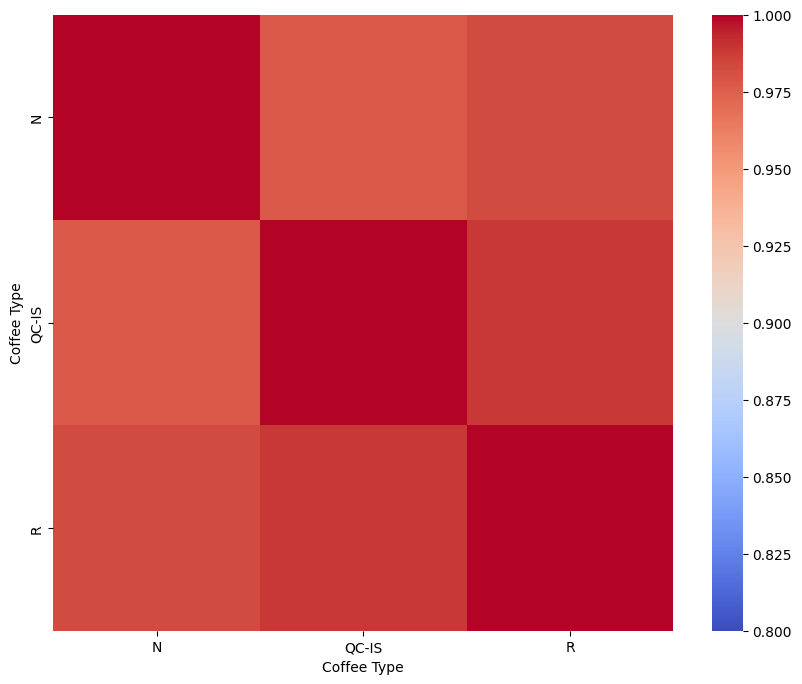

Coffee Type,N,QC-IS,R
Coffee Type,,,
N,1.000000,0.978006,0.982053
QC-IS,0.978006,1.000000,0.988286
R,0.982053,0.988286,1.000000


In [19]:
wf.statistics_correlation_means(column_name='Coffee Type', cmap = 'coolwarm', min_max=[0.8, 1])

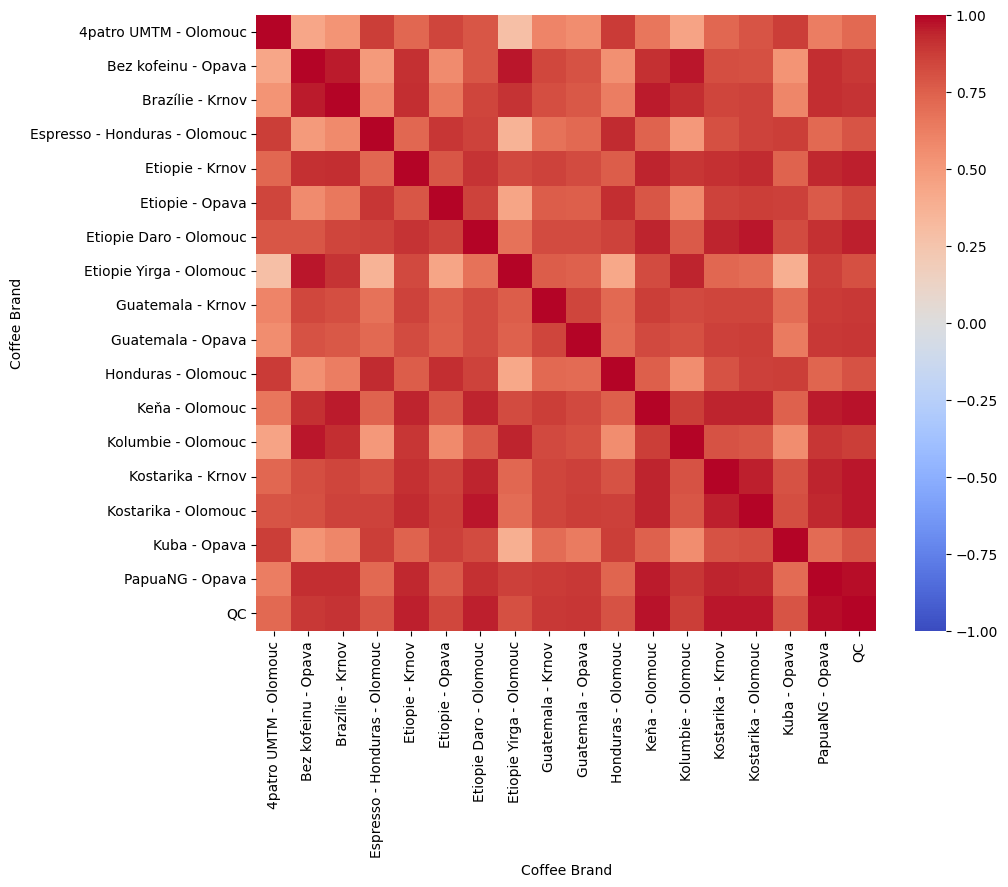

Coffee Brand,4patro UMTM - Olomouc,Bez kofeinu - Opava,Brazílie - Krnov,Espresso - Honduras - Olomouc,Etiopie - Krnov,Etiopie - Opava,Etiopie Daro - Olomouc,Etiopie Yirga - Olomouc,Guatemala - Krnov,Guatemala - Opava,Honduras - Olomouc,Keňa - Olomouc,Kolumbie - Olomouc,Kostarika - Krnov,Kostarika - Olomouc,Kuba - Opava,PapuaNG - Opava,QC
Coffee Brand,,,,,,,,,,,,,,,,,,
4patro UMTM - Olomouc,1.000000,0.429795,0.525486,0.873049,0.722288,0.850446,0.787505,0.282874,0.596618,0.555335,0.880577,0.661902,0.452520,0.722242,0.794984,0.874877,0.626991,0.713533
Bez kofeinu - Opava,0.429795,1.000000,0.954636,0.496898,0.906512,0.569654,0.787812,0.961598,0.836275,0.800452,0.542258,0.910699,0.963405,0.813987,0.806665,0.527717,0.919322,0.886270
Brazílie - Krnov,0.525486,0.954636,1.000000,0.571319,0.917228,0.653379,0.850167,0.899553,0.817390,0.775286,0.627783,0.958859,0.914972,0.845146,0.854733,0.591692,0.920011,0.901201
Espresso - Honduras - Olomouc,0.873049,0.496898,0.571319,1.000000,0.726156,0.893501,0.858849,0.360838,0.678462,0.714932,0.927851,0.734441,0.506487,0.811684,0.853194,0.872406,0.714964,0.794303
Etiopie - Krnov,0.722288,0.906512,0.917228,0.726156,1.000000,0.782883,0.905971,0.828163,0.857545,0.825995,0.761078,0.939214,0.895389,0.912223,0.923360,0.739648,0.935184,0.950421
Etiopie - Opava,0.850446,0.569654,0.653379,0.893501,0.782883,1.000000,0.858173,0.443348,0.760711,0.753649,0.918216,0.785597,0.573891,0.857845,0.872627,0.863758,0.772597,0.838788
Etiopie Daro - Olomouc,0.787505,0.787812,0.850167,0.858849,0.905971,0.858173,1.000000,0.679349,0.821930,0.823112,0.856540,0.939142,0.768725,0.943825,0.964707,0.824167,0.911430,0.949644
Etiopie Yirga - Olomouc,0.282874,0.961598,0.899553,0.360838,0.828163,0.443348,0.679349,1.000000,0.759533,0.746143,0.424850,0.828021,0.941734,0.725710,0.698165,0.389556,0.861042,0.805176
Guatemala - Krnov,0.596618,0.836275,0.817390,0.678462,0.857545,0.760711,0.821930,0.759533,1.000000,0.846018,0.713391,0.870417,0.831367,0.846990,0.849717,0.696679,0.878120,0.888446


In [20]:
wf.statistics_correlation_means(column_name='Coffee Brand', cmap = 'coolwarm')

### (Cohen's) d-statistics

In [21]:
#TO DO

### PCA

In [22]:
#Perform PCA
wf.statistics_PCA()

array([[ 1.17871850e+05,  5.06617176e+04, -1.45535173e+04, ...,
         1.06862240e+02, -1.43626894e+02,  2.75463208e-10],
       [ 7.08847738e+04,  3.22977034e+04, -1.26536736e+04, ...,
         3.48168405e+01, -2.28764892e+01,  2.77083245e-10],
       [ 3.04731428e+04,  1.44585079e+04, -4.74106476e+03, ...,
         1.27836148e+02,  2.47000827e+02,  2.77154300e-10],
       ...,
       [ 2.34990964e+05,  9.68493030e+04,  1.36927517e+04, ...,
         3.28072850e+02,  1.03879658e+02,  2.80579115e-10],
       [ 2.35311408e+05,  9.76281464e+04,  1.35760664e+04, ...,
         7.07419360e+01,  1.55406995e+02,  2.61024979e-10],
       [ 2.34587652e+05,  9.74921503e+04,  1.37735846e+04, ...,
        -2.60321109e+02, -1.30558358e+02,  2.74212653e-10]])

#### Scree plot

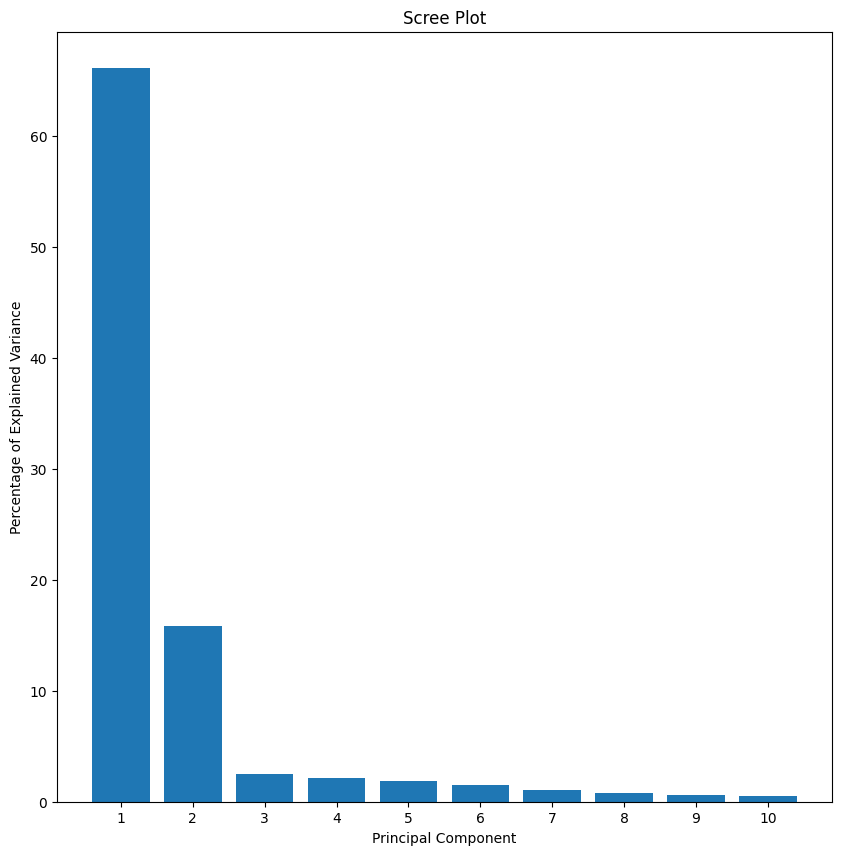

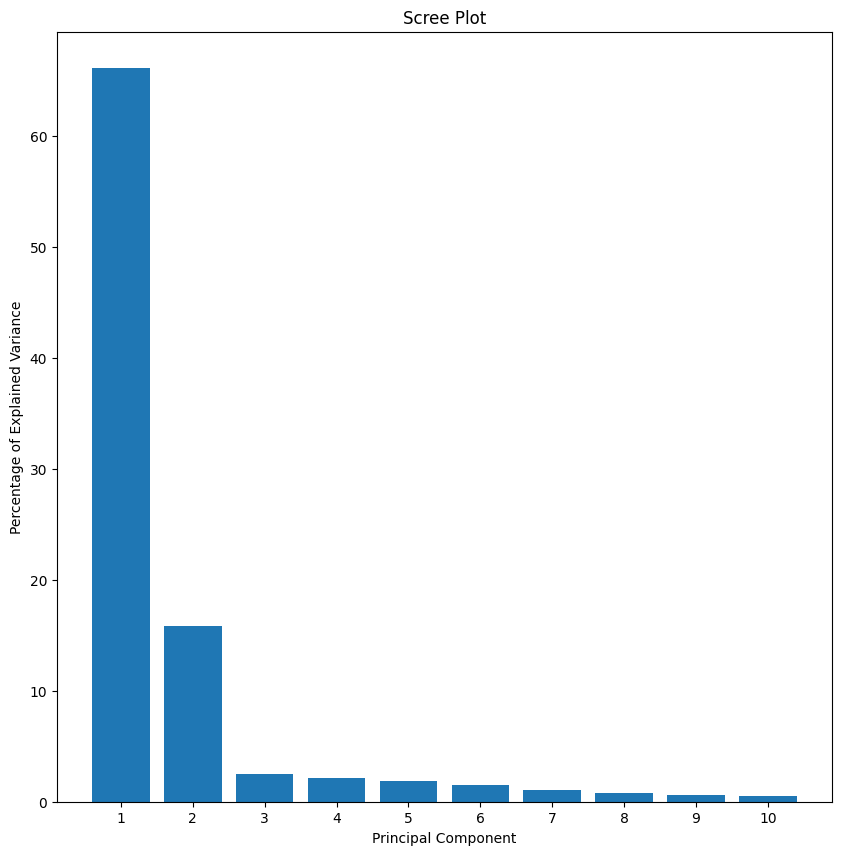

In [23]:
wf.visualizer_PCA_scree_plot()


#### Loadings

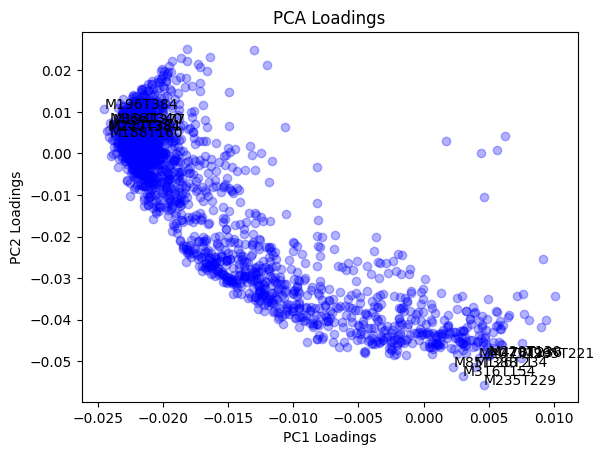

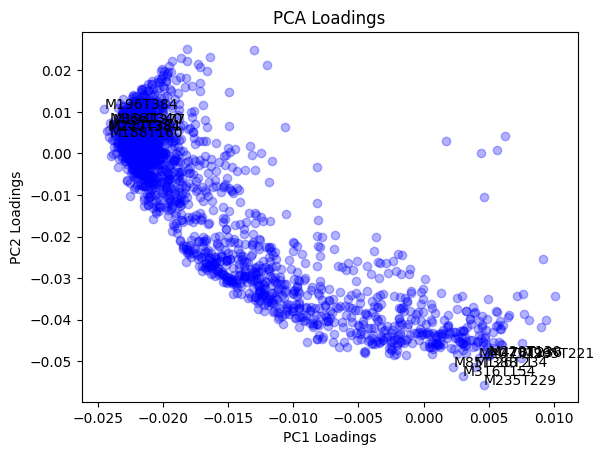

In [24]:
wf.visualizer_PCA_loadings(components=2)

#### Run order plot

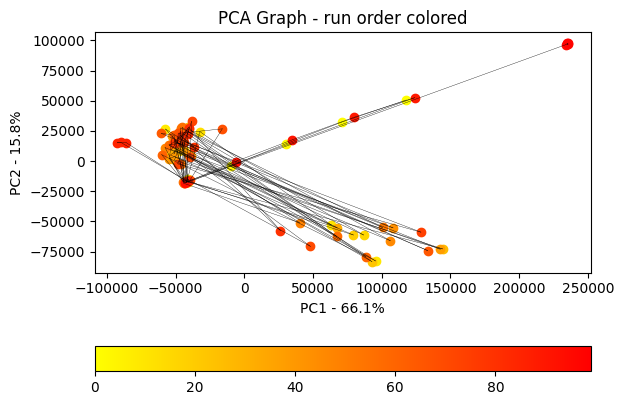

(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': 'PCA Graph - run order colored'}, xlabel='PC1 - 66.1%', ylabel='PC2 - 15.8%'>)

In [25]:
wf.visualizer_PCA_run_order(connected = True)

#### PCA grouped visualized

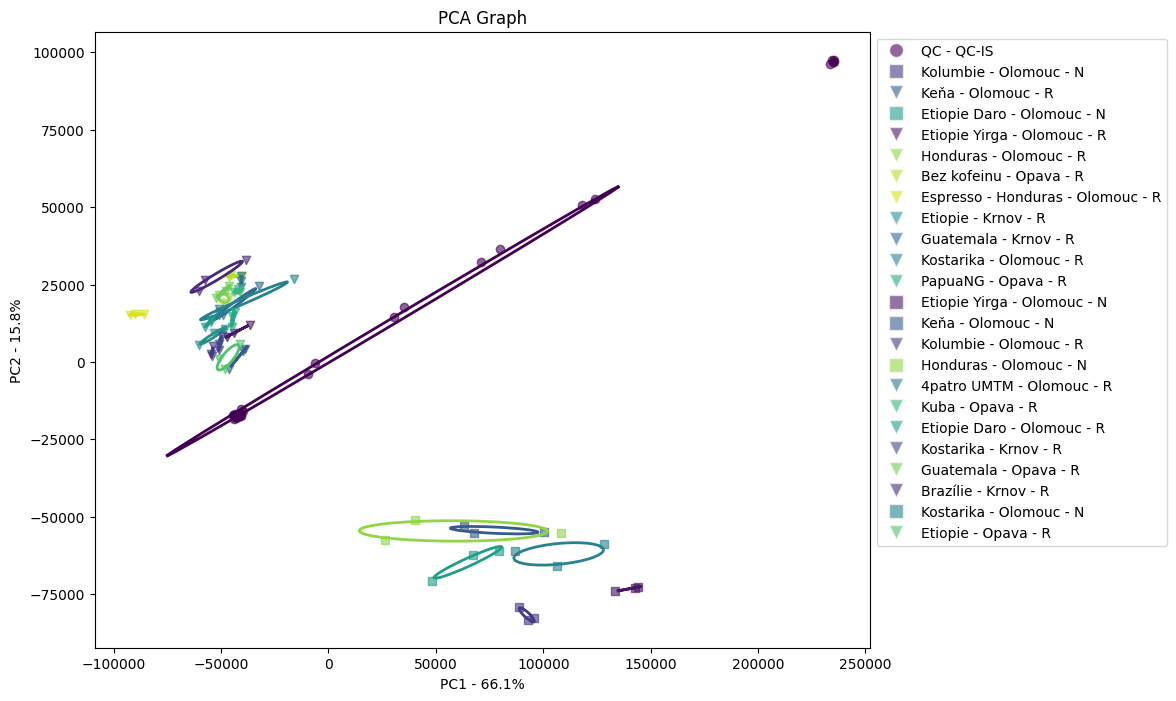

(<Figure size 1000x800 with 1 Axes>,
 <Axes: title={'center': 'PCA Graph'}, xlabel='PC1 - 66.1%', ylabel='PC2 - 15.8%'>)

In [26]:
wf.visualizer_PCA_grouped(color_column = 'Coffee Brand', marker_column='Coffee Type', cmap = 'viridis') 

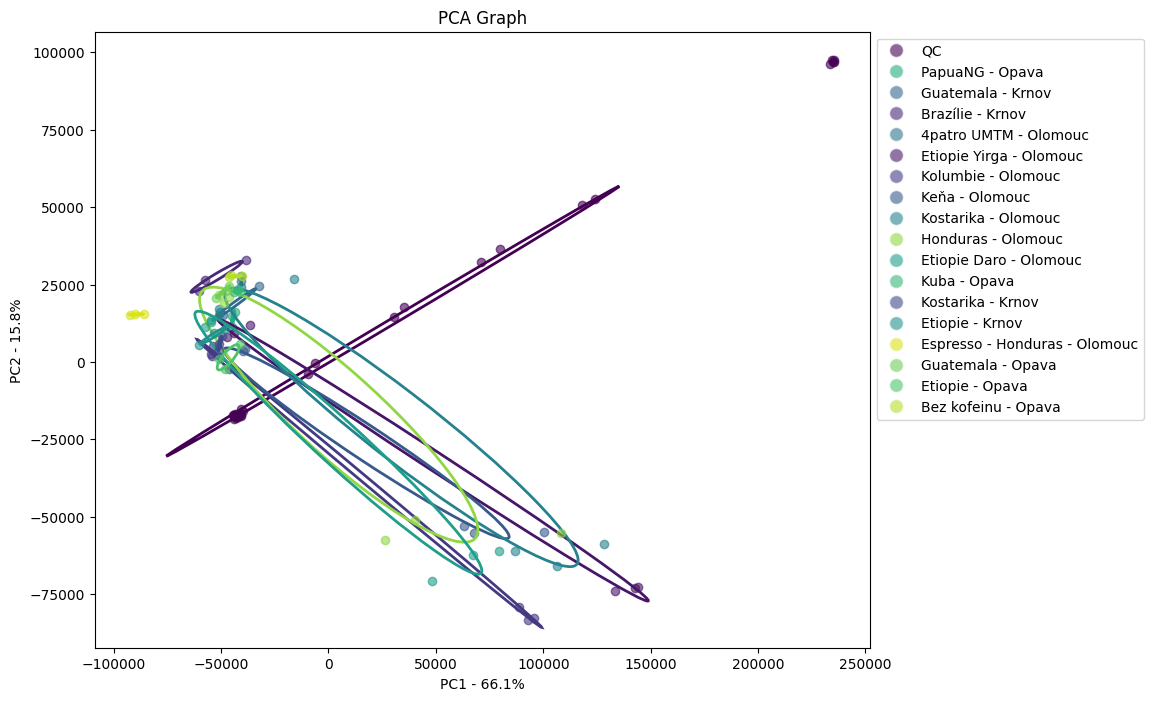

(<Figure size 1000x800 with 1 Axes>,
 <Axes: title={'center': 'PCA Graph'}, xlabel='PC1 - 66.1%', ylabel='PC2 - 15.8%'>)

In [27]:
wf.visualizer_PCA_grouped(color_column='Coffee Brand', marker_column=None, cmap = 'viridis')

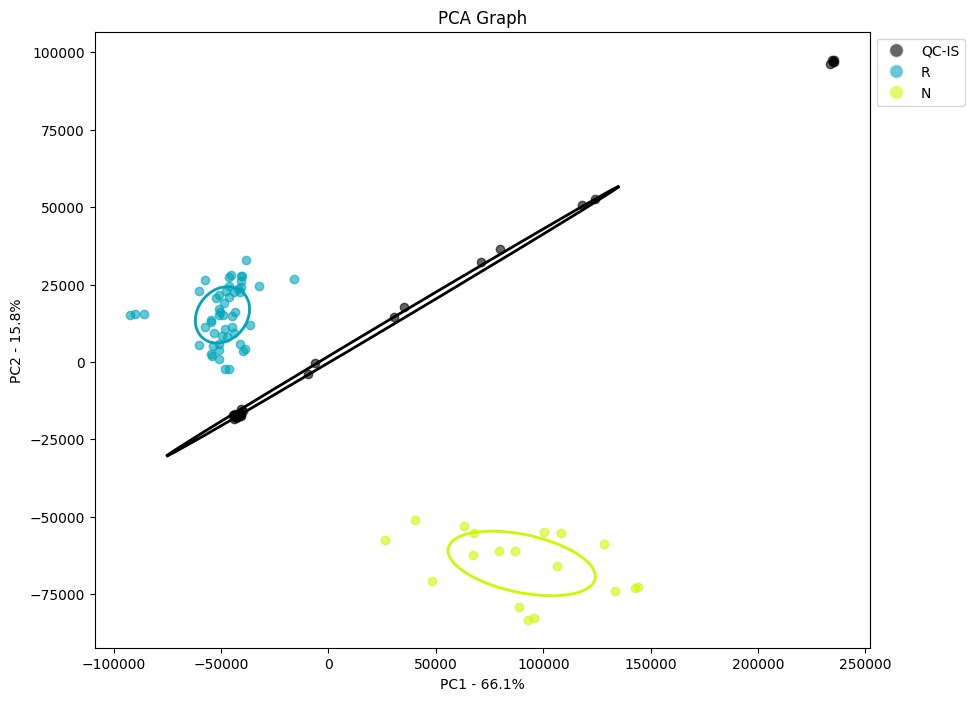

(<Figure size 1000x800 with 1 Axes>,
 <Axes: title={'center': 'PCA Graph'}, xlabel='PC1 - 66.1%', ylabel='PC2 - 15.8%'>)

In [28]:
wf.visualizer_PCA_grouped(color_column='Coffee Type', marker_column=None, cmap = 'nipy_spectral', crossout_outliers=True)

### PLS-DA

#### Perform PLS-DA by grouping by different atributes (response variable)

In [29]:
# Perform PLS-DA 
wf.statistics_PLSDA(response_column_names='Coffee Brand')

R2: -0.0803043682251307
Q2:
4patro UMTM - Olomouc           -0.720355
Bez kofeinu - Opava             -0.720355
Brazílie - Krnov                -0.720355
Espresso - Honduras - Olomouc   -0.720355
Etiopie - Krnov                 -0.720355
Etiopie - Opava                 -0.720355
Etiopie Daro - Olomouc           0.112075
Etiopie Yirga - Olomouc          0.112075
Guatemala - Krnov               -0.720355
Guatemala - Opava               -0.720355
Honduras - Olomouc               0.112075
Keňa - Olomouc                   0.112075
Kolumbie - Olomouc               0.112075
Kostarika - Krnov               -0.720355
Kostarika - Olomouc              0.112075
Kuba - Opava                    -0.720355
PapuaNG - Opava                 -0.720355
QC                               0.760646
dtype: float64


PLSRegression()

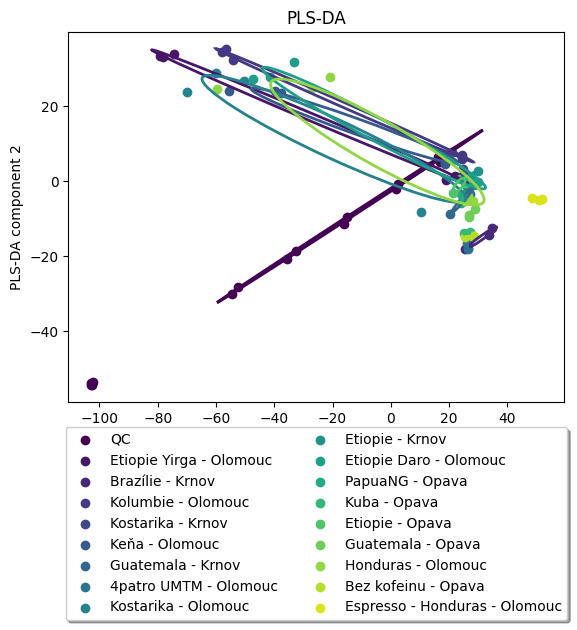

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'PLS-DA'}, xlabel='PLS-DA component 1', ylabel='PLS-DA component 2'>)

In [30]:
# Visualize the PLS-DA
wf.visualizer_PLSDA(cmap = 'viridis')

In [31]:
# Perform PLS-DA with different response column
wf.statistics_PLSDA(response_column_names='Coffee Type')

R2: 0.3753747655295682
Q2:
N        0.111300
QC-IS    0.374046
R        0.470701
dtype: float64


PLSRegression()

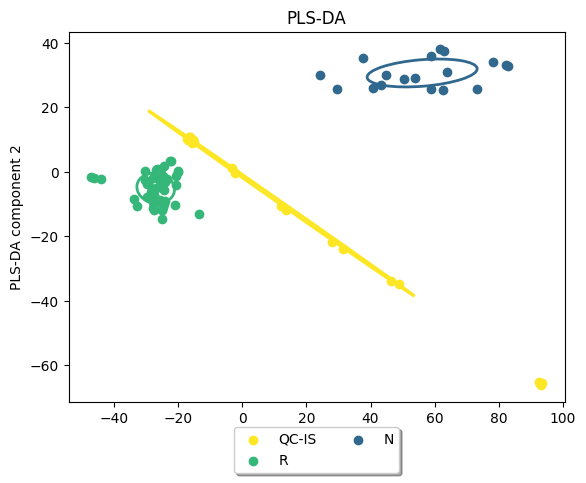

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'PLS-DA'}, xlabel='PLS-DA component 1', ylabel='PLS-DA component 2'>)

In [32]:
# Visualize the PLS-DA
wf.visualizer_PLSDA(cmap='viridis_r')

In [33]:
#Perform PLS-DA with multiple response columns (their combination)
wf.statistics_PLSDA(response_column_names=['Coffee Brand', 'Coffee Type'])

R2: -0.057959920398228525
Q2:
4patro UMTM - Olomouc_R           -0.303332
Bez kofeinu - Opava_R             -0.303332
Brazílie - Krnov_R                -0.303332
Espresso - Honduras - Olomouc_R   -0.303332
Etiopie - Krnov_R                 -0.303332
Etiopie - Opava_R                 -0.303332
Etiopie Daro - Olomouc_N          -0.303332
Etiopie Daro - Olomouc_R          -0.303332
Etiopie Yirga - Olomouc_N         -0.303332
Etiopie Yirga - Olomouc_R         -0.303332
Guatemala - Krnov_R               -0.303332
Guatemala - Opava_R               -0.303332
Honduras - Olomouc_N              -0.303332
Honduras - Olomouc_R              -0.303332
Keňa - Olomouc_N                  -0.303332
Keňa - Olomouc_R                  -0.303332
Kolumbie - Olomouc_N              -0.303332
Kolumbie - Olomouc_R              -0.303332
Kostarika - Krnov_R               -0.303332
Kostarika - Olomouc_N             -0.303332
Kostarika - Olomouc_R             -0.303332
Kuba - Opava_R                    -0.303332
Pa

PLSRegression()

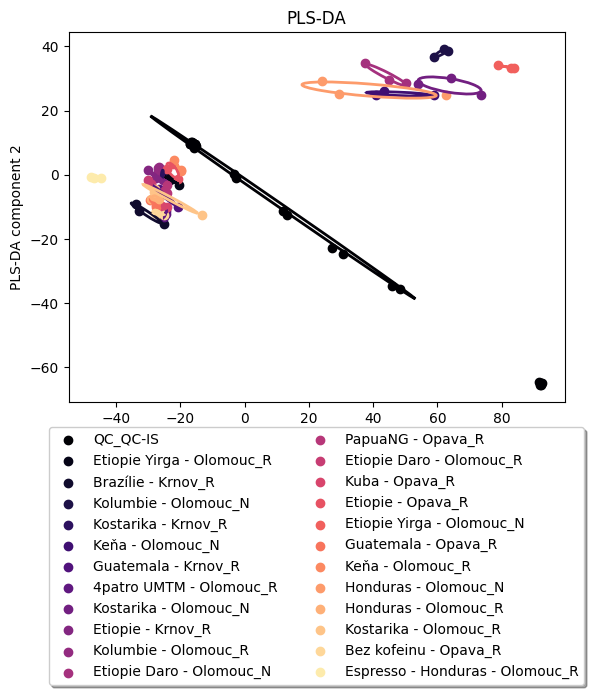

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'PLS-DA'}, xlabel='PLS-DA component 1', ylabel='PLS-DA component 2'>)

In [34]:
# Visualize the PLS-DA
wf.visualizer_PLSDA(cmap='magma')

### Violin plots

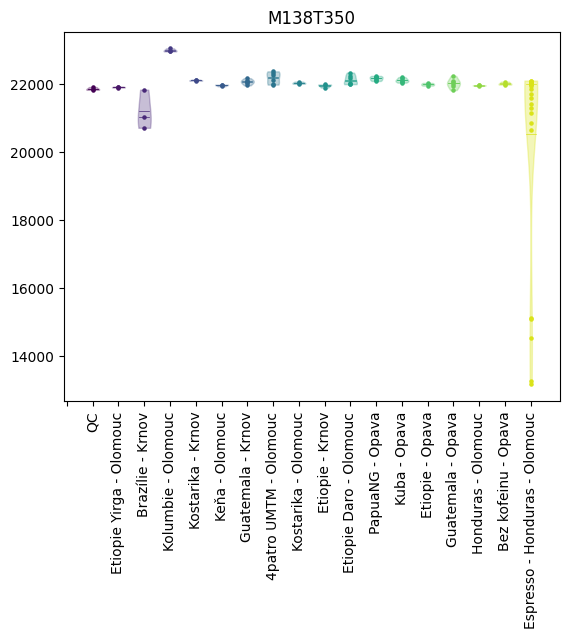

Violin plots created: 2731.04%


{'bodies': [<matplotlib.collections.PolyCollection at 0x10bdcb40760>,
  <matplotlib.collections.PolyCollection at 0x10bdbd83760>]}

In [35]:
# Visualize features as violin plots
wf.visualizer_violin_plots(column_names='Coffee Brand', indexes = 'all', save_into_pdf=True, show_first=True, cmap='viridis')

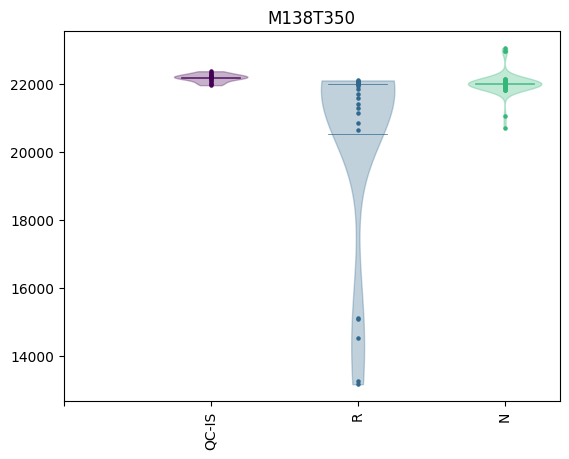

Violin plots created: 2731.04%


{'bodies': [<matplotlib.collections.PolyCollection at 0x10e0a496e90>,
  <matplotlib.collections.PolyCollection at 0x10e09467d30>]}

In [36]:
# Visualize features as violin plots with different grouping column
wf.visualizer_violin_plots(column_names='Coffee Type', indexes = 'all', save_into_pdf=True,  show_first=True, cmap='viridis')

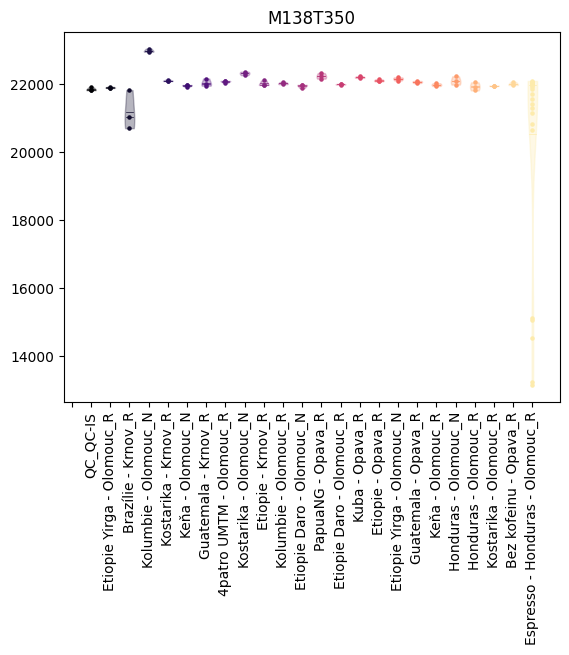

Violin plots created: 24.00%


{'bodies': [<matplotlib.collections.PolyCollection at 0x10dfa44e050>,
  <matplotlib.collections.PolyCollection at 0x10e0d6a7a00>]}

In [37]:
# Visualize features as violin plots with combination of grouping columns
wf.visualizer_violin_plots(column_names=['Coffee Brand', 'Coffee Type'], indexes = [0, 1, 2, 3, 4], save_into_pdf=False, show_first=True, cmap='magma')

### Printing out candidate variables features (compounds)

In [38]:
print(wf.candidate_variables)

[['PCA-Loadings', ['M265T221', 'M235T229', 'M188T160', 'M316T154', 'M407T199', 'M240T384', 'M220T130', 'M196T384', 'M194T377', 'M227T381', 'M126T234', 'M478T236', 'M366T340', 'M85T388_1']], ['PLS-DA vips', 1036       M421T97
1037     M421T97_1
1206      M181T229
1705      M339T223
1747      M237T235
1748      M238T233
1749      M238T234
1916       M149T90
2067    M135T202_1
2073      M552T232
2098      M265T252
2149      M337T202
2308      M527T430
2673      M288T461
Name: cpdID, dtype: object], ['PLS-DA vips', 194       M265T221
233       M235T229
266       M162T217
795       M342T388
1067      M146T383
1069      M316T154
1336      M347T396
1700      M509T388
1701    M509T388_1
1809      M434T153
1892      M126T234
2024      M147T381
2085      M478T236
2395      M522T388
Name: cpdID, dtype: object], ['PLS-DA vips', 233     M235T229
443     M517T229
892     M147T223
925     M370T228
1206    M181T229
1336    M347T396
1705    M339T223
1809    M434T153
1845    M298T198
1905    M166T199
20

## Final touches

In [39]:
# Finalize report 
wf.finalizer_report()

Report was finalized and is ready for viewing.
